# Assignment 1

### Business Understanding

Introduction - The Iowa Liquor Sales dataset is an API from Google’s Bigquery which contains the spirits purchase detail of Iowa Class “E” liquor license holders by product, date of purchase, and location the item was purchased from. The timeframe of this data starts from January 1, 2012 through 2019. As part of the study commissioned by the Iowa Department of Commerce, all alcoholic sales within the state were logged into the Department system, and in turn, published as open data by the State of Iowa. The dataset contains detail on the name, product, quantity and location of the individual container or package sale. 

1. Set Objectives: We are a new and emerging Whisky brand who specializes in single-malt Rye, and we have targeted the state of Iowa for our next brand expansion. Before doing so, our goal will be to identify and predict which markets are more likely to sell greater volumes of whiskey, so that we can more efficiently spend our marketing dollars and inventory with little waste or buyback. Related questions also include, which brands are going to sell the most in each market, what parts of the year are going to have higher whiskey sales as opposed to lower whiskey sales to optimize advertising dollars, and what features of a town are defining characteristics of a large whiskey seller. 

2. Product Project Plan: To meet our goals, we will first use the Google Bigquery API to access the publicly available Iowa Liquor Sales data via python and Jupyter Notebook. Since the dataset is over 17 million lines of data, we will focus just on 2 months worth of data to do the cleaning. From here, we will define a subset to grant us 30,000 observations, address missing values and begin to build models that could help us answer questions based on markets likely to sell more whiskey. For our data on times of the year when we will sell more whiskey, we will need to create a subset of a full year’s data to build a time series model. For the town features, we will need to include additional information about the zip codes of iowa (such as population, income, ect) to get more demographic detail on each market to assist with a program for a clustering problem. For each of these problems, we will create a training and testing data set to help tune our predictions. 

3. Business Success Criteria - For our prediction models of market sales, we will be consider our model successful if we are able to classify our alochol type with a strong precision, recall and accuracy using a cross validation. Ideally, if we are dealing with 5 alcohol types, we will want to be able to predict whiskey accurately over 20% of the time. 

From the sale price prediction problem, we will run a linear regression technique against the remaining features. For this technique, we will use Root Mean Square Error to evaluate the effectiveness. A strong criteria for performance would be if we can get within $3 as an RMSE.

Joe's thoughts for classification -  
 - Logistic Margin above or below a certain point. e.g. sales retail / costs > 35%

## Data Meaning Type - Describe the meaning and type of data for each attribute in the data file

The data was collected via Google’s BigQuery tool in their Cloud Platform. The data was publicly available within the platform as an educational resource. The data is regularly updated through BigQuery, but .csv files can be found via sites like Kaggle.com. 

The description of all 24 fields of the data attributes can be found at https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy. We are working with the fields to start out with, to help begin the process of feature reduction and correlation analysis. Some of the data has no useful information for analysis, which we will likely be removing eventually. 

Below is a description of each feature available in the data set.

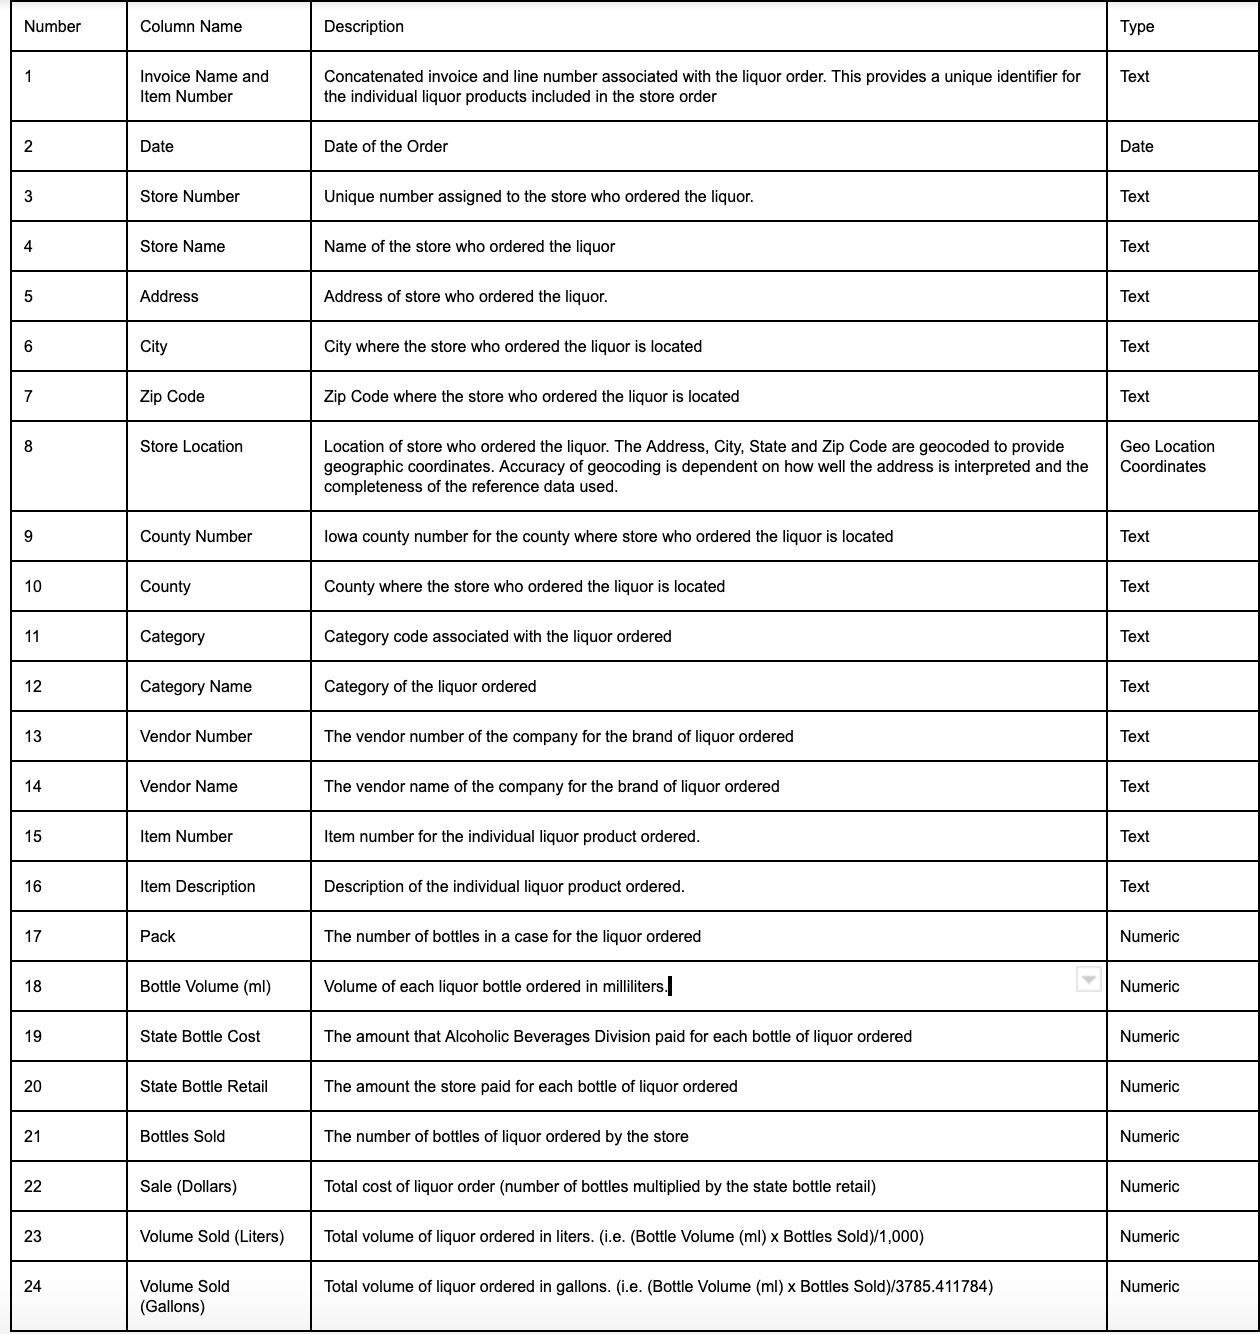

## Data Quality

In [1]:
# below is import of python packages.
try:
    from collections import abc as collections_abc
except ImportError:  # Python 2.7
    import collections as collections_abc

    import copy
import functools
import gzip
import io
import itertools
import json
import math
import os
import tempfile
import uuid
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
#import altair as alt
import matplotlib.pyplot as plt
import re

# Imports the Google Cloud client library
#from google.cloud import storage
from google.oauth2 import service_account
from google.cloud import bigquery

### Load in the Data

In order to load in our data, we will need to create a project id and save in our .json credentials from BigQuery onto our local machine. From there, we can set the client variable to map the credentials to our service account in our bigquery program. 

In [92]:
#project = 'macro-campaign-202100'
#credentials = service_account.Credentials.from_service_account_file(r'/Users/danielclark/Desktop/SMU/data_mining/My Project-71c2d48ddfb0.json')
#project = 'flash-ward-264717'
#credentials = service_account.Credentials.from_service_account_file(r'/Users/jjsch/Downloads/My Project 35341-372d7a58bfb3.json')
#C:\Users\jjsch\Downloads


#client = bigquery.Client(credentials=credentials, project=project)


For our measurement, we will be querying the 2019 data using an earlier sql pull and limiting the rows to 50,000 for our intiial modeling, which we can later expand to see how our model translates to scale. 

In [28]:
#begindate = '2012-01-01'
#enddate = '2012-03-31'
  
#query = "select * FROM `bigquery-public-data.iowa_liquor_sales.sales` where date > '" +begindate + "' and date <= '" + enddate +"' --LIMIT " 
#df = client.query(query).to_dataframe()

df =  pd.read_csv(r'/Users/jjschued/Documents/Github/7331DataMiningNotebooks/lab1/iowa_subset_2019_400k_random_rows.csv', nrows = 50000)
#df =  pd.read_csv(r'/Users/danielclark/Desktop/SMU/data_mining/7331DataMiningNotebooks/lab1/iowa_subset_2019_400k_random_rows.csv', nrows = 50000)


In [29]:
df.info

<bound method DataFrame.info of       invoice_and_item_number        date  store_number  \
0             INV-23084400002  2019-11-07          3869   
1             INV-23282200001  2019-11-18          4617   
2             INV-19435800130  2019-05-17          2560   
3             INV-23454200002  2019-11-25          2614   
4             INV-23541200001  2019-11-27          2629   
...                       ...         ...           ...   
49995         INV-17241000143  2019-01-30          2616   
49996         INV-17382700010  2019-02-06          2548   
49997         INV-20839900001  2019-07-25          4509   
49998         INV-17608900026  2019-02-18          2575   
49999         INV-21188000001  2019-08-13          2535   

                                   store_name                     address  \
0                   Bootleggin' Barzini's Fin                412  1st Ave   
1                              Lickety Liquor            2501 HUBBELL AVE   
2                  Hy-Vee Fo

In [30]:
#df.to_csv(index=False)

In [31]:
df.columns.values

array(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'], dtype=object)

Running a df.columns.values function, confirms the 24 features that we referenced in our Data understanding phase. This now allows us to move forward with our data cleaning. 

### Data Cleaning

In our data cleaning step, we need to perform a few specific data cleaning operations. 1.) We will need to convert our features to the correct continuous, ordinal and categorical features, and 2.) we will need to address the missing values. 3.) We will want to create a category that simplifies our alcohol categories to specific genres like whiskey, vodka, tequilla, ect. 4.) We will also want to categorize our store locations into a few easily discernable buckets. 5.) Create a month and date column for opportunities to time and date analysis

To begin the process of addressing missing values so that we can convert our data types, we will replace all "?", which our dataset denotes as null, into "-1" values (not strings). From here, we will convert state_bottle_cost, state_bottle_retail, sale_dollars, volume_sold_liters, and volume_sold_gallons into continuous variables so they register as floats. 


In addition, we will need to convert the varaible "bottles_sold" into ordinal features so they register as an integer value in our models. 

Thirdly, we will want to replace the values for pack, bottle_volume_ml, store_number, store_name, address, city, zip_code, county_number, county, category, category_name, vendor_number, vendor_name, item_number and item_description into categorical variables so they register as a non-null object in our model.

Using a df.info function helps to verify this. 

The following will do some cleanup on values and categorize store, category, and dates into more summarized values

In [32]:
df.dtypes

invoice_and_item_number     object
date                        object
store_number                 int64
store_name                  object
address                     object
city                        object
zip_code                   float64
store_location              object
county_number              float64
county                      object
category                   float64
category_name               object
vendor_number                int64
vendor_name                 object
item_number                  int64
item_description            object
pack                         int64
bottle_volume_ml             int64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold                 int64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

In [33]:
#upper case category name for matching later
df['category_name'] = df['category_name'].str.upper()

In [34]:
df['category_name'][40:45]

40    TEMPORARY & SPECIALTY PACKAGES
41    TEMPORARY & SPECIALTY PACKAGES
42                        TRIPLE SEC
43                 IMPORTED DRY GINS
44                 IMPORTED DRY GINS
Name: category_name, dtype: object

In [35]:
#convert nan to blanks
df = (df.replace(r'^\s*$', np.nan, regex=True))

In [36]:
df = (df.replace(np.nan, 'blank', regex=True))

In [37]:
#download to categorize in more summarized manner
#liquortcatlistdf.to_csv("C:\\Users\\jjsch\\downloads\\liquorcats.csv")    
#import the file
#liquortcatlistdf = pd.read_csv("C:\\Users\\jjsch\\downloads\\liquorcats.csv")
#liquortcatlistdf = pd.read_csv("C:\\Users\\jjschued\\Documents\\SMU\\7331 Machine Learning\\Github\\7331DataMiningNotebooks\\liquorcats.csv")
#liquortcatlistdf.dtypes

#grouping all the store locations into parent stores
df['Category'] = 'Other'
df.loc[df['category_name'].str.contains('GINS'), 'Category'] = 'GIN'
df.loc[df['category_name'].str.contains('GINS'), 'Category'] = 'GIN'
df.loc[df['category_name'].str.contains('GIN'), 'Category'] = 'GIN'
df.loc[df['category_name'].str.contains('RUMS'), 'Category'] = 'RUM'
df.loc[df['category_name'].str.contains('RUM'), 'Category'] = 'RUM'
df.loc[df['category_name'].str.contains('SCOTCH'), 'Category'] = 'WHISKY'
df.loc[df['category_name'].str.contains('WHISKIES'), 'Category'] = 'WHISKY'
df.loc[df['category_name'].str.contains('WHISKY'), 'Category'] = 'WHISKY'
df.loc[df['category_name'].str.contains('WHISKEY'), 'Category'] = 'WHISKY'
df.loc[df['category_name'].str.contains('RYE'), 'Category'] = 'WHISKY'
df.loc[df['category_name'].str.contains('AMARETTO'), 'Category'] = 'AMARETTO'
df.loc[df['category_name'].str.contains('BOURBON'), 'Category'] = 'WHISKY'
df.loc[df['category_name'].str.contains('LIQUEURS'), 'Category'] = 'LIQUEUR'
df.loc[df['category_name'].str.contains('LIQUEUR'), 'Category'] = 'LIQUEUR'
df.loc[df['category_name'].str.contains('VODKAS'), 'Category'] = 'VODKA'
df.loc[df['category_name'].str.contains('VODKA'), 'Category'] = 'VODKA'
df.loc[df['category_name'].str.contains('BRANDY'), 'Category'] = 'BRANDY'
df.loc[df['category_name'].str.contains('BRANDIES'), 'Category'] = 'GIN'
df.loc[df['category_name'].str.contains('CREME'), 'Category'] = 'SCHNAPPS'
df.loc[df['category_name'].str.contains('SCHNAPPS'), 'Category'] = 'SCHNAPPS'
df.loc[df['category_name'].str.contains('TEQUILA'), 'Category'] = 'TEQUILA'
df.loc[df['category_name'].str.contains('TEQUILAS'), 'Category'] = 'TEQUILA'




In [38]:
#get a few stray not available categories per internet this is tequila
df.loc[df['item_description'] == 'Herradura Gold Reposado 6pak', 'Category'] = "Tequila"
df.loc[df['item_description'] == 'Chambord Liqueur w/2 Glasses', 'Category'] = "Liquers"

#grouping all the store locations into parent stores
df['store_parent'] = 'Other'
df.loc[df['store_name'].str.contains('Hy-Vee'), 'store_parent'] = 'Hy-Vee'
df.loc[df['store_name'].str.contains('Wal-Mart'), 'store_parent'] = 'Wal-Mart'
df.loc[df['store_name'].str.contains('SamsClub'), 'store_parent'] = 'SamsClub'
df.loc[df['store_name'].str.contains('Fareway'), 'store_parent'] = 'Fareway'
df.loc[df['store_name'].str.contains('Kum&Go'), 'store_parent'] = 'Kum&Go'
df.loc[df['store_name'].str.contains('CVS'), 'store_parent'] = 'CVS'
df.loc[df['store_name'].str.contains('Target'), 'store_parent'] = 'Target'
df.loc[df['store_name'].str.contains('Caseys'), 'store_parent'] = 'Caseys'
df.loc[df['store_name'].str.contains('Dahls'), 'store_parent'] = 'Dahls'
df.loc[df['store_name'].str.contains('WAL-MART'), 'store_parent'] = 'Wal-Mart'
df.loc[df['store_name'].str.contains('HY-VEE'), 'store_parent'] = 'Hy-Vee'
df.loc[df['store_name'].str.contains('KUM&GO'), 'store_parent'] = 'Kum&Go'
df.loc[df['store_name'].str.contains('QuikTrip'), 'store_parent'] = 'QuikTrip'


#labored conversion of dates to month year and month year by converting to strings
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

df.loc[df['month'] ==1 , 'month'] = 'Jan'
df.loc[df['month'] ==2 , 'month'] = 'Feb'
df.loc[df['month'] ==3 , 'month'] = 'Mar'
df.loc[df['month'] ==4 , 'month'] = 'Apr'
df.loc[df['month'] ==5 , 'month'] = 'May'
df.loc[df['month'] ==6 , 'month'] = 'Jun'
df.loc[df['month'] ==7 , 'month'] = 'Jul'
df.loc[df['month'] ==8 , 'month'] = 'Aug'
df.loc[df['month'] ==9 , 'month'] = 'Sep'
df.loc[df['month'] ==10 , 'month'] = 'Oct'
df.loc[df['month'] ==11 , 'month'] = 'Nov'
df.loc[df['month'] ==12 , 'month'] = 'Dec'


df.loc[df['year'] ==2012 , 'year'] = '2012'
df.loc[df['year'] ==2013 , 'year'] = '2013'
df.loc[df['year'] ==2014 , 'year'] = '2014'
df.loc[df['year'] ==2015 , 'year'] = '2015'
df.loc[df['year'] ==2016 , 'year'] = '2016'
df.loc[df['year'] ==2017 , 'year'] = '2017'
df.loc[df['year'] ==2018 , 'year'] = '2018'
df.loc[df['year'] ==2019 , 'year'] = '2019'

#merge year and month together
df['monthyear'] = df['month'] + "-" + df['year']

In [39]:
df.head(20)

invoice_and_item_number        date  store_number  \
0          INV-23084400002  2019-11-07          3869   
1          INV-23282200001  2019-11-18          4617   
2          INV-19435800130  2019-05-17          2560   
3          INV-23454200002  2019-11-25          2614   
4          INV-23541200001  2019-11-27          2629   
5          INV-23540300028  2019-11-27          4312   
6          INV-19655400089  2019-05-29          2517   
7          INV-23687700099  2019-12-05          2545   
8          INV-17141800065  2019-01-25          5210   
9          INV-23109300014  2019-11-08          5411   
10         INV-23072700074  2019-11-06          2642   
11         INV-19202100034  2019-05-07          5173   
12         INV-23553600002  2019-11-29          2190   
13         INV-23551100140  2019-11-27          2565   
14         INV-23566000005  2019-11-29          4192   
15         INV-19970300001  2019-06-13          2675   
16         INV-20083400001  2019-06-19          3773   
17         INV-16691300021  2019-01-02          4678   
18         INV-20399700023  2019-07-03          3990   
19         INV-17191900090  2019-01-28          2573   

                                store_name                     address  \
0                Bootleggin' Barzini's Fin                412  1st Ave   
1                           Lickety Liquor            2501 HUBBELL AVE   
2               Hy-Vee Food Store / Marion  3600 Business Hwy 151 East   
3   Hy-Vee #3 Food & Drugstore / Davenport          1823 E Kimberly Rd   
4    Hy-Vee Food Store #2 / Council Bluffs            1745 Madison Ave   
5             I-80 Liquor / Council Bluffs           2411 S 24TH ST #1   
6            Hy-Vee Food Store #1 / Newton      1501 First Avenue East   
7             Hy-Vee Drugstore / Iowa City                310 N 1st St   
8                     Ding's Honk'n Holler      900, E  Washington  St   
9                           Bluejay Market              2810 Wills Ave   
10         Hy-Vee Wine and Spirits / Pella             512 E Oskaloosa   
11                       Audubon Food Land               104 Market St   
12               Central City Liquor, Inc.                1460 2ND AVE   
13       Hy-Vee Food Store #1636 / Spencer             819 N Grand Ave   
14        Fareway Stores #044 / Bettendorf             3800 Belmont Rd   
15                  Hy-Vee #2 / Coralville           3285 Crosspark Rd   
16                       Benz Distributing              501 7th Ave SE   
17              Fareway Stores #124 / Adel         804 Nile Kinnick Dr   
18             Cork and Bottle / Oskaloosa              309 A Ave West   
19           Hy-Vee Food Store / Muscatine                2400 2nd Ave   

              city zip_code                         store_location  \
0       Coralville    52241           POINT (-91.565517 41.672672)   
1       Des Moines    50317           POINT (-93.570489 41.607817)   
2           Marion    52302                                  blank   
3        Davenport    52807   POINT (-90.548919 41.55678100000001)   
4   Council Bluffs    51503           POINT (-95.825137 41.242732)   
5   Council Bluffs    51501             POINT (-95.8792 41.238092)   
6           Newton    50208            POINT (-93.034296 41.69916)   
7        Iowa City    52245           POINT (-91.528105 42.207428)   
8         Clarinda    51632           POINT (-95.027238 40.739231)   
9            Perry    50220           POINT (-94.081127 41.838488)   
10           Pella    50219  POINT (-92.899277 41.396961000000005)   
11         Audubon    50025            POINT (-94.93625 41.723057)   
12      Des Moines    50314            POINT (-93.619787 41.60566)   
13         Spencer    51301            POINT (-95.14506 43.145897)   
14      Bettendorf    52722           POINT (-90.480368 41.556273)   
15      Coralville    52241   POINT (-91.60627100000002 41.721438)   
16    Cedar Rapids    52401            POINT (-91.659875 41.97574)   
17         

At the far right of the above dataset, you can see the 5 new columns we created and thier respective values. 

In [40]:
import numpy as np
# replace '?' with -1, we will deal with missing values later
df = df.replace(to_replace='?',value=-1) 

categorical_features = ['city', 'county',  'category_name','vendor_name', 'store_number', 'item_description','store_parent', 
                        'monthyear', 'Category', 'county_number', 'vendor_number', 'item_number']

# let's start by first changing the numeric values to be floats
continuous_features = ['state_bottle_cost', 'state_bottle_retail', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'bottles_sold']

# and the oridnal values to be integers
ordinal_features = ['pack', 'bottle_volume_ml']

# use the "astype" function to change the variable type
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)
df[categorical_features] = df[categorical_features].astype(object)
df.info() # now our data looks better!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
invoice_and_item_number    50000 non-null object
date                       50000 non-null object
store_number               50000 non-null object
store_name                 50000 non-null object
address                    50000 non-null object
city                       50000 non-null object
zip_code                   50000 non-null object
store_location             50000 non-null object
county_number              50000 non-null object
county                     50000 non-null object
category                   50000 non-null object
category_name              50000 non-null object
vendor_number              50000 non-null object
vendor_name                50000 non-null object
item_number                50000 non-null object
item_description           50000 non-null object
pack                       50000 non-null int64
bottle_volume_ml           50000 non-null int64
state_bottl

In [41]:
dfstats = df.describe() # will get summary of continuous or the nominals

# let's set those values to NaN, so that Pandas understand they are missing
df = df.replace(to_replace=-1,value=np.nan) # replace -1 with NaN (not a number)
print (df.info())
df[categorical_features] = df[categorical_features].astype(object)
dfstats2 = df.describe() # scroll over to see the values

categorical_features = ['city', 'county',  'category_name','vendor_name', 'store_number', 'item_description','store_parent', 
                        'monthyear', 'Category', 'county_number', 'vendor_number', 'item_number']

# let's start by first changing the numeric values to be floats
continuous_features = ['state_bottle_cost', 'state_bottle_retail', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'bottles_sold']

# and the oridnal values to be integers
ordinal_features = ['pack', 'bottle_volume_ml']

# use the "astype" function to change the variable type
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)
df[categorical_features] = df[categorical_features].astype(object)
df['store_number'] = df['store_number'].astype(object)
df.info() # now our data looks better!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
invoice_and_item_number    50000 non-null object
date                       50000 non-null object
store_number               50000 non-null int64
store_name                 50000 non-null object
address                    50000 non-null object
city                       50000 non-null object
zip_code                   50000 non-null object
store_location             50000 non-null object
county_number              50000 non-null object
county                     50000 non-null object
category                   50000 non-null object
category_name              50000 non-null object
vendor_number              50000 non-null int64
vendor_name                50000 non-null object
item_number                50000 non-null int64
item_description           50000 non-null object
pack                       50000 non-null int64
bottle_volume_ml           50000 non-null int64
state_bottle_c

Here, you can see that our cleaning has addressed all nulls down to zero so we can begin analysis. The count code below helps to show that there is zero nulls in our dataset.

In [42]:
dfna = df[df.isna().any(axis=1)]
dfna.isna().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
Category                   0
store_parent               0
month                      0
year                       0
monthyear                  0
dtype: int64

The next task will be for us to look into our categorical features with over 30 unique values, and we will be dropping any columns that have more than 30 uniques. The reason we are doing this is that we will ultimately have trouble with our predictions as these values will likely ultimately have unique attributes to a specific combination of observations. 

In [43]:
#Unique Value Threshold (Per Column)
#Delete Columns >  uniqueThreshold unique values prior to one-hot encoding. 
#(each unique value becomes a new column during one-hot encoding)
uniqueThreshold = 30
# in each column of dataframe
uniqueValues = df.nunique()
uniqueValues

invoice_and_item_number    50000
date                         263
store_number                1626
store_name                  1634
address                     1626
city                         409
zip_code                     443
store_location              1500
county_number                100
county                       129
category                      40
category_name                 40
vendor_number                112
vendor_name                  113
item_number                 1180
item_description            1149
pack                          15
bottle_volume_ml              22
state_bottle_cost            651
state_bottle_retail          651
bottles_sold                 100
sale_dollars                3407
volume_sold_liters           211
volume_sold_gallons          210
Category                       7
store_parent                   6
month                         12
year                           1
monthyear                     12
dtype: int64

In [44]:
#Isolate continuous and categorical data types
#These are indexers into the schoolData dataframe and may be used similar to the schoolData dataframe 
D_boolean = df.loc[:, (df.dtypes == bool) ]
D_nominal = df.loc[:, (df.dtypes == object)]
D_continuous = df.loc[:, (df.dtypes != bool) & (df.dtypes != object)]
print ("Boolean Columns: ", D_boolean.shape[1])
print ("Nominal Columns: ", D_nominal.shape[1])
print ("Continuous Columns: ", D_continuous.shape[1])
print ("Columns Accounted for: ", D_nominal.shape[1] + D_continuous.shape[1] + D_boolean.shape[1])

Boolean Columns:  0
Nominal Columns:  21
Continuous Columns:  8
Columns Accounted for:  29


In [45]:
#Delete categorical columns with > 30 unique values (Each unique value becomes a column during one-hot encoding)
oneHotUniqueValueCounts = df[D_nominal.columns].apply(lambda x: x.nunique())
oneHotUniqueValueCols = oneHotUniqueValueCounts[oneHotUniqueValueCounts >= uniqueThreshold].index

In [46]:
oneHotUniqueValueCounts
oneHotUniqueValueCols

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description'],
      dtype='object')

In [47]:
oneHotUniqueValueCols

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description'],
      dtype='object')

In [48]:
onehotlist = oneHotUniqueValueCols.tolist()
onehotlist

['invoice_and_item_number',
 'date',
 'store_number',
 'store_name',
 'address',
 'city',
 'zip_code',
 'store_location',
 'county_number',
 'county',
 'category',
 'category_name',
 'vendor_number',
 'vendor_name',
 'item_number',
 'item_description']

In [49]:
#one hot encoding
dfenc = df.copy()
dfenc

invoice_and_item_number        date store_number  \
0             INV-23084400002  2019-11-07         3869   
1             INV-23282200001  2019-11-18         4617   
2             INV-19435800130  2019-05-17         2560   
3             INV-23454200002  2019-11-25         2614   
4             INV-23541200001  2019-11-27         2629   
...                       ...         ...          ...   
49995         INV-17241000143  2019-01-30         2616   
49996         INV-17382700010  2019-02-06         2548   
49997         INV-20839900001  2019-07-25         4509   
49998         INV-17608900026  2019-02-18         2575   
49999         INV-21188000001  2019-08-13         2535   

                                   store_name                     address  \
0                   Bootleggin' Barzini's Fin                412  1st Ave   
1                              Lickety Liquor            2501 HUBBELL AVE   
2                  Hy-Vee Food Store / Marion  3600 Business Hwy 151 East   
3      Hy-Vee #3 Food & Drugstore / Davenport          1823 E Kimberly Rd   
4       Hy-Vee Food Store #2 / Council Bluffs            1745 Madison Ave   
...                                       ...                         ...   
49995          Hy-Vee Food and Drug / Clinton            901 South 4th St   
49996             Hy-Vee Food Store / Altoona           100 8th Street SW   
49997                          AJ'S LIQUOR II            2515 Chamberlain   
49998         Hy-Vee Food Store #1 / Waterloo         2834 Ansborough Ave   
49999              Hy-Vee Food Store #1 / WDM         1700 Valley West Dr   

                  city zip_code                         store_location  \
0           Coralville    52241           POINT (-91.565517 41.672672)   
1           Des Moines    50317           POINT (-93.570489 41.607817)   
2               Marion    52302                                  blank   
3            Davenport    52807   POINT (-90.548919 41.55678100000001)   
4       Council Bluffs    51503           POINT (-95.825137 41.242732)   
...                ...      ...                                    ...   
49995          Clinton    52732  POINT (-90.193204 41.836268000000004)   
49996          Altoona    50009           POINT (-93.465301 41.644041)   
49997             Ames    50010           POINT (-93.650838 42.021461)   
49998         Waterloo    50702   POINT (-92.37662400000002 42.471767)   
49999  West Des Moines    50265                                  blank   

      county_number      county  ... state_bottle_retail bottles_sold  \
0                52     JOHNSON  ...                5.78         20.0   
1                77        POLK  ...               13.13          1.0   
2                57        LINN  ...               24.75          6.0   
3                82       SCOTT  ...               31.76         24.0   
4                78  POTTAWATTA  ...               13.97         12.0   
...             ...         ...  ...                 ...          ...   
49995            23     CLINTON  ...                6.59         12.0   
49996            77        POLK  ...               17.99         12.0   
49997            85       STORY  ...                5.45         24.0   
49998             7  BLACK HAWK  ...               22.49         12.0   
49999            77        POLK  ...               24.14         12.0   

      sale_dollars volume_sold_liters volume_sold_gallons Category  \
0           115.60               7.50                1.98    Other   
1            13.13               0.05                0.01    Other   
2           148.50               6.00                1.58      GIN   
3           762.24              18.00                4.75   WHISKY   
4           167.64              21.00                5.54    Other   
...            ...                ...                 ...      ...   
49995       102.96               9.00                2.37  LIQUEUR   
49996       215.88               9.00                2.37 

In [50]:
dfenc.drop(onehotlist, axis=1, inplace=True)

In [51]:
dfenc

pack  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0        20               375               3.85                 5.78   
1         8                50               8.75                13.13   
2        12              1000              16.50                24.75   
3         6               750              21.17                31.76   
4         6              1750               9.31                13.97   
...     ...               ...                ...                  ...   
49995    12               750               4.39                 6.59   
49996    12               750              11.99                17.99   
49997    24               375               3.63                 5.45   
49998    12               750              14.99                22.49   
49999    12               750              16.09                24.14   

       bottles_sold  sale_dollars  volume_sold_liters  volume_sold_gallons  \
0              20.0        115.60                7.50                 1.98   
1               1.0         13.13                0.05                 0.01   
2               6.0        148.50                6.00                 1.58   
3              24.0        762.24               18.00                 4.75   
4              12.0        167.64               21.00                 5.54   
...             ...           ...                 ...                  ...   
49995          12.0        102.96                9.00                 2.37   
49996          12.0        215.88                9.00                 2.37   
49997          24.0        130.80                9.00                 2.37   
49998          12.0        269.88                9.00                 2.37   
49999          12.0        289.68                9.00                 2.37   

      Category store_parent month  year monthyear  
0        Other        Other   Nov  2019  Nov-2019  
1        Other        Other   Nov  2019  Nov-2019  
2          GIN       Hy-Vee   May  2019  May-2019  
3       WHISKY       Hy-Vee   Nov  2019  Nov-2019  
4        Other       Hy-Vee   Nov  2019  Nov-2019  
...        ...          ...   ...   ...       ...  
49995  LIQUEUR       Hy-Vee   Jan  2019  Jan-2019  
49996  LIQUEUR       Hy-Vee   Feb  2019  Feb-2019  
49997    Other        Other   Jul  2019  Jul-2019  
49998      RUM       Hy-Vee   Feb  2019  Feb-2019  
49999    Other       Hy-Vee   Aug  2019  Aug-2019  

[50000 rows x 13 columns]

In [52]:
df

invoice_and_item_number        date store_number  \
0             INV-23084400002  2019-11-07         3869   
1             INV-23282200001  2019-11-18         4617   
2             INV-19435800130  2019-05-17         2560   
3             INV-23454200002  2019-11-25         2614   
4             INV-23541200001  2019-11-27         2629   
...                       ...         ...          ...   
49995         INV-17241000143  2019-01-30         2616   
49996         INV-17382700010  2019-02-06         2548   
49997         INV-20839900001  2019-07-25         4509   
49998         INV-17608900026  2019-02-18         2575   
49999         INV-21188000001  2019-08-13         2535   

                                   store_name                     address  \
0                   Bootleggin' Barzini's Fin                412  1st Ave   
1                              Lickety Liquor            2501 HUBBELL AVE   
2                  Hy-Vee Food Store / Marion  3600 Business Hwy 151 East   
3      Hy-Vee #3 Food & Drugstore / Davenport          1823 E Kimberly Rd   
4       Hy-Vee Food Store #2 / Council Bluffs            1745 Madison Ave   
...                                       ...                         ...   
49995          Hy-Vee Food and Drug / Clinton            901 South 4th St   
49996             Hy-Vee Food Store / Altoona           100 8th Street SW   
49997                          AJ'S LIQUOR II            2515 Chamberlain   
49998         Hy-Vee Food Store #1 / Waterloo         2834 Ansborough Ave   
49999              Hy-Vee Food Store #1 / WDM         1700 Valley West Dr   

                  city zip_code                         store_location  \
0           Coralville    52241           POINT (-91.565517 41.672672)   
1           Des Moines    50317           POINT (-93.570489 41.607817)   
2               Marion    52302                                  blank   
3            Davenport    52807   POINT (-90.548919 41.55678100000001)   
4       Council Bluffs    51503           POINT (-95.825137 41.242732)   
...                ...      ...                                    ...   
49995          Clinton    52732  POINT (-90.193204 41.836268000000004)   
49996          Altoona    50009           POINT (-93.465301 41.644041)   
49997             Ames    50010           POINT (-93.650838 42.021461)   
49998         Waterloo    50702   POINT (-92.37662400000002 42.471767)   
49999  West Des Moines    50265                                  blank   

      county_number      county  ... state_bottle_retail bottles_sold  \
0                52     JOHNSON  ...                5.78         20.0   
1                77        POLK  ...               13.13          1.0   
2                57        LINN  ...               24.75          6.0   
3                82       SCOTT  ...               31.76         24.0   
4                78  POTTAWATTA  ...               13.97         12.0   
...             ...         ...  ...                 ...          ...   
49995            23     CLINTON  ...                6.59         12.0   
49996            77        POLK  ...               17.99         12.0   
49997            85       STORY  ...                5.45         24.0   
49998             7  BLACK HAWK  ...               22.49         12.0   
49999            77        POLK  ...               24.14         12.0   

      sale_dollars volume_sold_liters volume_sold_gallons Category  \
0           115.60               7.50                1.98    Other   
1            13.13               0.05                0.01    Other   
2           148.50               6.00                1.58      GIN   
3           762.24              18.00                4.75   WHISKY   
4           167.64              21.00                5.54    Other   
...            ...                ...                 ...      ...   
49995       102.96               9.00                2.37  LIQUEUR   
49996       215.88               9.00                2.37 

In [115]:
#'month', 'year', 'county_number',
#Isolate continuous and categorical data types
#These are indexers into the schoolData dataframe and may be used similar to the schoolData dataframe 
dfenc_boolean = dfenc.loc[:, (dfenc.dtypes == bool) ]
dfenc_nominal = dfenc.loc[:, (dfenc.dtypes == object)]
dfenc_continuous = dfenc.loc[:, (dfenc.dtypes != bool) & (df.dtypes != object)]
print ("Boolean Columns: ", dfenc_boolean.shape[1])
print ("Nominal Columns: ", dfenc_nominal.shape[1])
print ("Continuous Columns: ", dfenc_continuous.shape[1])
print ("Columns Accounted for: ", dfenc_nominal.shape[1] + dfenc_continuous.shape[1] + dfenc_boolean.shape[1])

one_hot_df = pd.concat([pd.get_dummies(dfenc[col],prefix=col) for col in dfenc_nominal.columns], axis=1)
one_hot_df.head()

Boolean Columns:  0
Nominal Columns:  5
Continuous Columns:  8
Columns Accounted for:  13


Category_GIN  Category_LIQUEUR  Category_Other  Category_RUM  \
0             0                 0               1             0   
1             0                 0               1             0   
2             1                 0               0             0   
3             0                 0               0             0   
4             0                 0               1             0   

   Category_TEQUILA  Category_VODKA  Category_WHISKY  store_parent_CVS  \
0                 0               0                0                 0   
1                 0               0                0                 0   
2                 0               0                0                 0   
3                 0               0                1                 0   
4                 0               0                0                 0   

   store_parent_Fareway  store_parent_Hy-Vee  ...  monthyear_Dec-2019  \
0                     0                    0  ...                   0   
1                     0                    0  ...                   0   
2                     0                    1  ...                   0   
3                     0                    1  ...                   0   
4                     0                    1  ...                   0   

   monthyear_Feb-2019  monthyear_Jan-2019  monthyear_Jul-2019  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   monthyear_Jun-2019  monthyear_Mar-2019  monthyear_May-2019  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   1   
3                   0                   0                   0   
4                   0                   0                   0   

   monthyear_Nov-2019  monthyear_Oct-2019  monthyear_Sep-2019  
0                   1                   0                   0  
1                   1                   0                   0  
2                   0                   0                   0  
3                   1                   0                   0  
4                   1                   0                   0  

[5 rows x 38 columns]

yikes, we have over 57,000 columns. 

On the one hot encoding dataset, we are going to drop the colums, vendor_number, item_number, and store_number as they will be redundant to other features in our dataset.

From here, lets see how big our dataset gets when we onehot our categorical variables. 

In [54]:
df.head()

invoice_and_item_number        date store_number  \
0         INV-23084400002  2019-11-07         3869   
1         INV-23282200001  2019-11-18         4617   
2         INV-19435800130  2019-05-17         2560   
3         INV-23454200002  2019-11-25         2614   
4         INV-23541200001  2019-11-27         2629   

                               store_name                     address  \
0               Bootleggin' Barzini's Fin                412  1st Ave   
1                          Lickety Liquor            2501 HUBBELL AVE   
2              Hy-Vee Food Store / Marion  3600 Business Hwy 151 East   
3  Hy-Vee #3 Food & Drugstore / Davenport          1823 E Kimberly Rd   
4   Hy-Vee Food Store #2 / Council Bluffs            1745 Madison Ave   

             city zip_code                        store_location  \
0      Coralville    52241          POINT (-91.565517 41.672672)   
1      Des Moines    50317          POINT (-93.570489 41.607817)   
2          Marion    52302                                 blank   
3       Davenport    52807  POINT (-90.548919 41.55678100000001)   
4  Council Bluffs    51503          POINT (-95.825137 41.242732)   

  county_number      county  ... state_bottle_retail bottles_sold  \
0            52     JOHNSON  ...                5.78         20.0   
1            77        POLK  ...               13.13          1.0   
2            57        LINN  ...               24.75          6.0   
3            82       SCOTT  ...               31.76         24.0   
4            78  POTTAWATTA  ...               13.97         12.0   

  sale_dollars volume_sold_liters volume_sold_gallons Category  store_parent  \
0       115.60               7.50                1.98    Other         Other   
1        13.13               0.05                0.01    Other         Other   
2       148.50               6.00                1.58      GIN        Hy-Vee   
3       762.24              18.00                4.75   WHISKY        Hy-Vee   
4       167.64              21.00                5.54    Other        Hy-Vee   

   month  year  monthyear  
0    Nov  2019   Nov-2019  
1    Nov  2019   Nov-2019  
2    May  2019   May-2019  
3    Nov  2019   Nov-2019  
4    Nov  2019   Nov-2019  

[5 rows x 29 columns]

In [55]:
df[df.isnull().any(axis=1)][df.columns[df.isnull().any()]]

Empty DataFrame
Columns: []
Index: []

In [46]:
# this python magics will allow plot to be embedded into the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [56]:
df['Category'].value_counts()

VODKA      13027
WHISKY     10556
Other       9155
LIQUEUR     7007
RUM         5608
GIN         3101
TEQUILA     1546
Name: Category, dtype: int64

Looking at a quick count of our categories, we can see that Vodka appears the most often in our dataet, at over 13,000 times followed by Whisky with over 10,000 instances. 

Below, we created a column called cost_per_liter and isolated the sales that exceeded $20,000. There were 7 total values with 6 of the 7 being Vodka Varieties. However, note the cost of liter is not that high in relation to to the sale and the volume sold per liters are almost all in the quadruple digits, which suggest these are cheaper alcohols being sold in high volume. 4 of the 7 sales were at Hy-Vee, which we will look at soon. 

In [57]:
# selecting rows based on condition
exp_df = df[df['sale_dollars'] > 20000]

exp_df['cost_per_liter'] = exp_df['sale_dollars']/exp_df['volume_sold_liters']

print(exp_df[['sale_dollars', 'volume_sold_liters', 'cost_per_liter', 'Category', 'store_parent']])

C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


       sale_dollars  volume_sold_liters  cost_per_liter Category store_parent
1480       25009.92              2016.0       12.405714    VODKA        Other
12772      22588.80              1170.0       19.306667      RUM       Hy-Vee
24758      31347.00              4725.0        6.634286    VODKA        Other
25507      22668.00              1200.0       18.890000    VODKA       Hy-Vee
32191      25239.36              1098.0       22.986667    VODKA       Hy-Vee
32454      20688.00               900.0       22.986667    VODKA       Hy-Vee
42212      37514.88              3024.0       12.405714    VODKA        Other


## Simple Statistics

The df.describe funciton below provides some simple statistcs for the numeric values in the table. 

We can see that the average sale was just under a 12 pack with under a 900 ml bottle volume at a cost of 13.39 per bottle. The bottles retailed an average of 20 dollars per with 169 dollars per sale. The cost per liter of each sale was 33 dollars. 

This goes to align with what a typical box of liquor bottles tend to look like and (at 12 per pack) and the cost per retail is aligned with a 7 dollar profit per bottle, which seems reasonable. 

The median values are  smaller than the mean values we are seeing in our datset, which suggests that our distribution of our sample population is right skewed. Which is confirmed with some of the values we are seeing with the max, such as a 37,500 liquor sale and a sale that included 2700 bottles.

The counts show that there is no missing values in the data we were provided with all sales accounted for. Below are some cross field statistics to review.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
invoice_and_item_number    50000 non-null object
date                       50000 non-null object
store_number               50000 non-null object
store_name                 50000 non-null object
address                    50000 non-null object
city                       50000 non-null object
zip_code                   50000 non-null object
store_location             50000 non-null object
county_number              50000 non-null object
county                     50000 non-null object
category                   50000 non-null object
category_name              50000 non-null object
vendor_number              50000 non-null object
vendor_name                50000 non-null object
item_number                50000 non-null object
item_description           50000 non-null object
pack                       50000 non-null int64
bottle_volume_ml           50000 non-null int64
state_bottl

In [58]:
df.describe()

pack  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
count  50000.000000      50000.000000       50000.000000         50000.000000   
mean      11.772740        871.934060          13.394573            20.094518   
std        8.244936        455.928174          11.745491            17.618159   
min        1.000000         50.000000           0.890000             1.340000   
25%        6.000000        750.000000           5.380000             8.070000   
50%       12.000000        750.000000          11.040000            16.560000   
75%       12.000000       1000.000000          18.090000            27.140000   
max       48.000000       6000.000000         262.460000           393.690000   

       bottles_sold  sale_dollars  volume_sold_liters  volume_sold_gallons  
count  50000.000000  50000.000000        50000.000000         50000.000000  
mean      11.510400    169.250258           10.519123             2.773666  
std       42.463618    585.357263           55.927518            14.774748  
min        1.000000      2.570000            0.050000             0.010000  
25%        2.000000     36.000000            1.500000             0.390000  
50%        6.000000     76.800000            4.500000             1.180000  
75%       12.000000    169.560000           10.500000             2.770000  
max     2700.000000  37514.880000         4725.000000          1248.210000

In [63]:
dfenc.mode()

pack  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0    12               750              18.09                27.14   

   bottles_sold  sale_dollars  volume_sold_liters  volume_sold_gallons  \
0          12.0        162.84                 9.0                 2.37   

  Category store_parent month  year monthyear  
0    VODKA        Other   Dec  2019  Dec-2019

Some Interesting facts can be found in the mode section. Vodka has the largest number of sales, and the small package stores combined take up more sales than a single big-box retailer. 

The most common pack size is 12 pack, which is efficient for shipping and the most common bottle size is 750 ml. 

December 2019 is the most popular month for alcohol sales, which suggest that people drink heavily that time of year. :)

## Visualize Attributes
The following section shows our cross tabulations of the relationships we found with our 2019 liquor data. The bar charts and box plots are ablet o show the distribution of our data and a comparative between categorical variables in our set. 



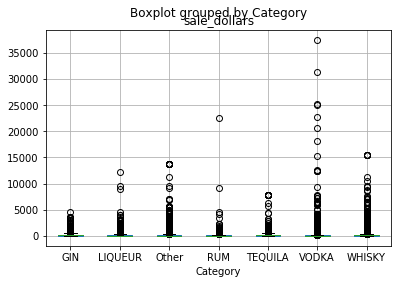

In [64]:
# pandas has some really powerful extensions to matplotlib for scientific computing 
ax = df.boxplot(column = 'sale_dollars', by = 'Category')
ax



This box plot is graphing the distribution sale_dollars with the different categories of liquor we have available. Here, we can see there is a significant number of outliers across all categories, so much that you can't really see the boxes on each category. This would suggest we would want to look into a transform.

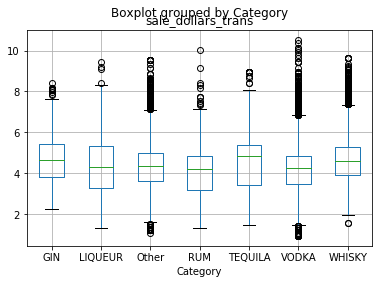

In [65]:
df['sale_dollars_trans'] = np.log(df['sale_dollars'])

gx = df.boxplot(column = 'sale_dollars_trans', by = 'Category')
gx


This is much more helpful for us to see how our distribution of categories compares to one another. Vodka and Whiskey are still showing a wider range of outliers, however Liquer tends to have a wider bounding than the other categories, which suggests that it has a wide variety of pricing. On average, tequila looks to have the higher medium sale value, which suggest that more money is being spent on tequilla on average. 

Using Sales dollars trans will help address outliers in the future.

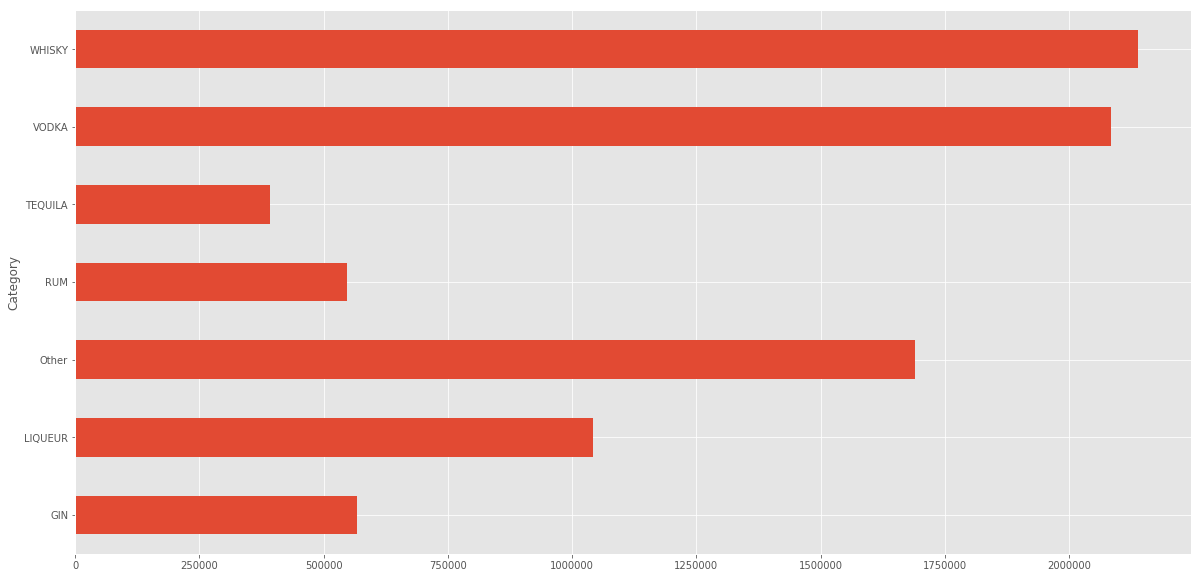

In [66]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
df_grouped = df.groupby(by=['Category'])
sales_rate = df_grouped.sale_dollars.sum()
ax = sales_rate.plot(kind='barh')

Looking at an agregate of our different alcohol categories, we can see that Whiskey generated the highest number of sales in our datase at close to 2.5 million followed by vodka at closer to 2 million. This chart seems to show that Vodka and Whiskey are the two most highest selling alcohols in the state of Iowa in 2019 with no one liquor coming close. 

In [67]:
df_grouped.head(5)

invoice_and_item_number        date store_number  \
0             INV-23084400002  2019-11-07         3869   
1             INV-23282200001  2019-11-18         4617   
2             INV-19435800130  2019-05-17         2560   
3             INV-23454200002  2019-11-25         2614   
4             INV-23541200001  2019-11-27         2629   
5             INV-23540300028  2019-11-27         4312   
6             INV-19655400089  2019-05-29         2517   
7             INV-23687700099  2019-12-05         2545   
14            INV-23566000005  2019-11-29         4192   
15            INV-19970300001  2019-06-13         2675   
24            INV-23645000007  2019-12-03         5866   
25            INV-19684100047  2019-05-30         4073   
29            INV-19201600066  2019-05-07         2651   
33            INV-16789600092  2019-01-07         2573   
34            INV-20689800014  2019-07-17         5293   
36            INV-23871500052  2019-12-12         4988   
37            INV-23844500030  2019-12-11         5293   
39            INV-17028600022  2019-01-18         4522   
43            INV-20141300151  2019-06-21         2560   
44            INV-20841100115  2019-07-25         4129   
46            INV-23686300014  2019-12-05         2675   
56            INV-23794300008  2019-12-10         5592   
60            INV-23300600126  2019-11-18         4167   
206           INV-19688800021  2019-05-30         4698   
243           INV-23556700122  2019-11-29         4129   
1011          INV-22289800001  2019-10-03         4677   
1296          INV-22932700001  2019-10-31         4677   
1362          INV-22417800001  2019-10-09         2285   
1480          INV-22297300005  2019-10-03         3814   
8507          INV-19973100001  2019-06-13         4129   
15765         INV-23453800096  2019-11-25         3952   
15766         INV-23451700037  2019-11-25         2619   
15767         INV-16840300169  2019-01-09         2621   
15768         INV-23852700088  2019-12-11         5257   
15769         INV-19261400055  2019-05-09         5162   

                                   store_name                     address  \
0                   Bootleggin' Barzini's Fin                412  1st Ave   
1                              Lickety Liquor            2501 HUBBELL AVE   
2                  Hy-Vee Food Store / Marion  3600 Business Hwy 151 East   
3      Hy-Vee #3 Food & Drugstore / Davenport          1823 E Kimberly Rd   
4       Hy-Vee Food Store #2 / Council Bluffs            1745 Madison Ave   
5                I-80 Liquor / Council Bluffs           2411 S 24TH ST #1   
6               Hy-Vee Food Store #1 / Newton      1501 First Avenue East   
7                Hy-Vee Drugstore / Iowa City                310 N 1st St   
14           Fareway Stores #044 / Bettendorf             3800 Belmont Rd   
15                     Hy-Vee #2 / Coralville           3285 Crosspark Rd   
24                     Hometown Family Market                  310 2nd St   
25                         Uptown Liquor, Llc            306 Hwy 69 South   
29                           Hy-Vee / Waverly            1311 4 Street SW   
33              Hy-Vee Food Store / Muscatine                2400 2nd Ave   
34                             The Boonedocks               228, N Hwy 71   
36                     Happy's Wine & Spirits         5925 University Ave   
37                             The Boonedocks               228, N Hwy 71   
39       Casey's General Store #2523 / Monroe                201 Ralph St   
43                 Hy-Vee Food Store / Marion  3600 Business Hwy 151 East   
44                            Cyclone Liquors             626 Lincoln Way   
46                     Hy-Vee #2 / Coralville           3285 Crosspark Rd   
56                               Hubers Store                 101 Main St   
60                   Iowa Street Market, Inc.                1256 Iowa St   
206                        Quality Quick Stop        201 W Burlington

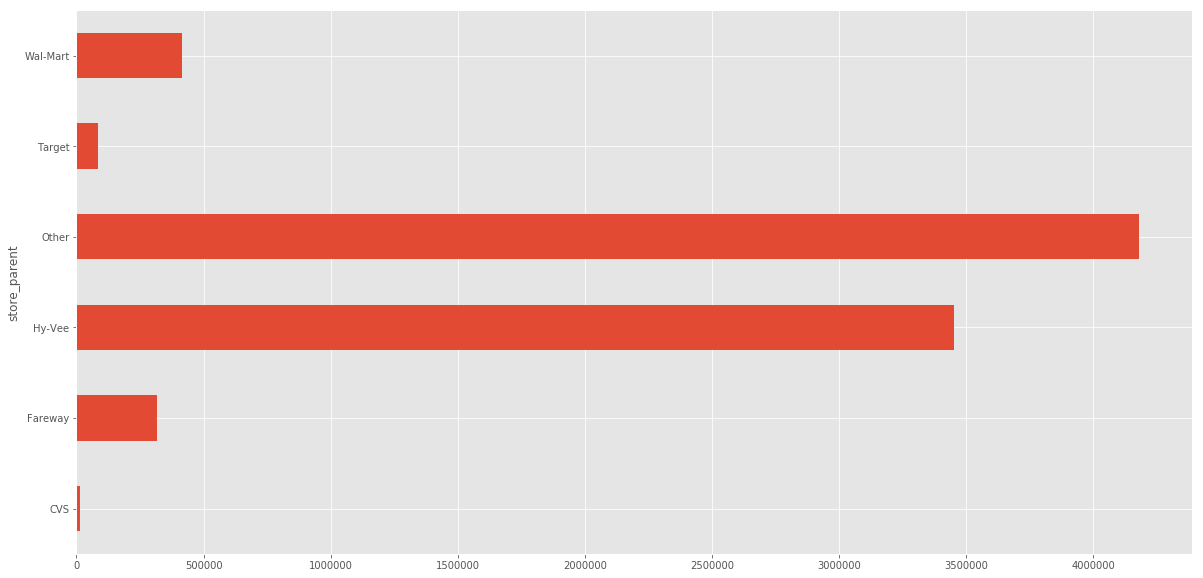

In [68]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
df_grouped = df.groupby(by=['store_parent'])
sales_rate = df_grouped.sale_dollars.sum()
ax = sales_rate.plot(kind='barh')

For our stores in our dataset, as we discussed previously, we decided to focus on the big box retailers as our starting point, and lumped in the smaller stores into a category called "other". As we can see, the other column drove the greatest overall sales at over 4 million, however the Hy Vee in iowa was close to it at nearly 3.5 million in sales. In the state of Iowa, Hy Vee is a widely popular grocery store chain in Iowa that sales alocholic beverages as per the laws in Iowa. 

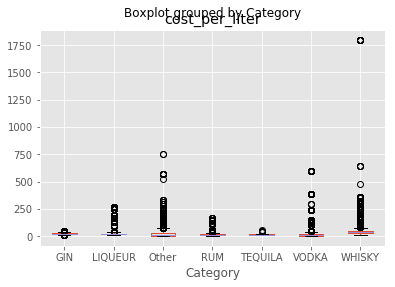

In [69]:
df['cost_per_liter'] = df['sale_dollars']/df['volume_sold_liters']


bx = df.boxplot(column = 'cost_per_liter', by = 'Category')
bx

Looking at the cost per liter aggregate column. As we discussed previously, cost per liter is calculated via a calculation of total sales_dollars divided by the total volume_sold_ml. The idea of this calculation is to see the varying price of the liquors if we normalize by the volume and sale of the liquors in our set. 

Here, we can see that our distribution is right skewed with a large outlier for whiskey which is going for over 1750 per liter. Looking further into this datapoint, we can see that this datapoint represents Johnnie Walker Blue. 

That said, with the distribution of alcohol types, outside of Johnnie walker blue, we cans see that our cost per liter is going to have a greater than tenfold range, so, i would suggest we create a transform there as well. 

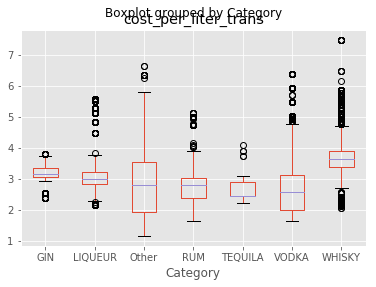

In [70]:
df['cost_per_liter_trans'] = np.log(df['cost_per_liter'])

zx = df.boxplot(column = 'cost_per_liter_trans', by = 'Category')
zx

This new box plot shows some interesting insight into the distribution and the value placed on alcohol in our dataset. 

Gin and Tequilla - even with outliers, it is going to have a faily consistent price per liter. 
Liquer - Similar case as GIn, however, it's outliers go a little farther out. 
Other- as expected, has a very wide range with very few outliers. Since this represents all types of alcohol not covered in the other categories, the box plot shape is expected. 

Whiskey - Has a faily consistent bounding, however the number out outliers on either side is very large and larger than the other categories. 

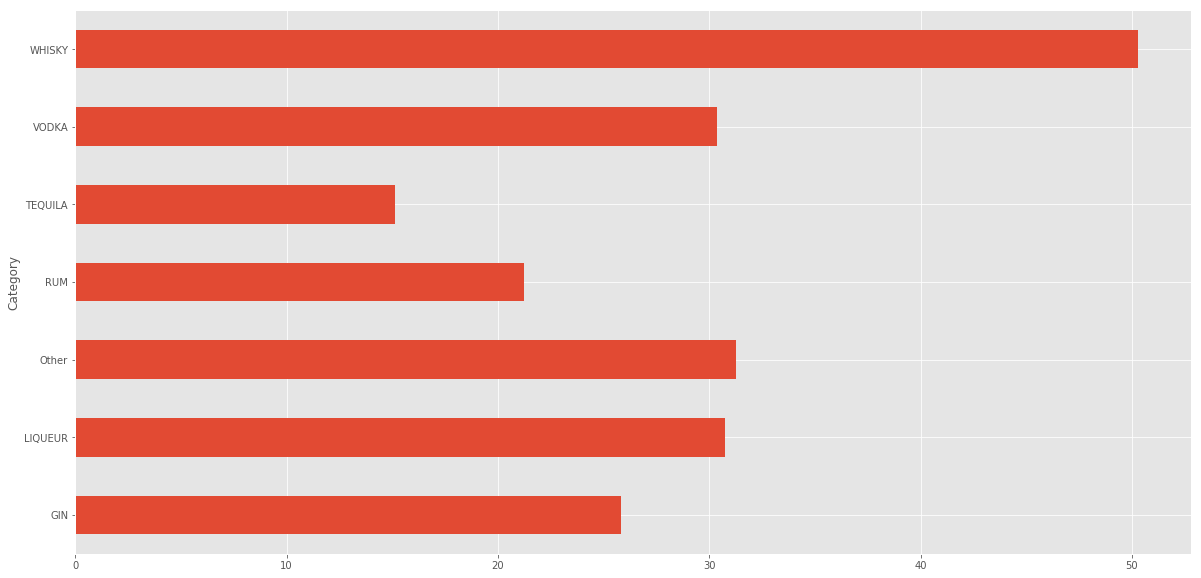

In [71]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
df_grouped = df.groupby(by=['Category'])
sales_rate = df_grouped.cost_per_liter.mean()
ax = sales_rate.plot(kind='barh')

This plot shows the grouped average cost per liter by the type of liquor in our dataset. Coming in at over 50 dollars per liter, whiskey is the most expensive alcohol in our dataset. However, some of that can come from the Johnnie Walker Blue we discussed previously, the common theme is that whiskey tends to be more expensive liter for liter than the other types of alcohol.

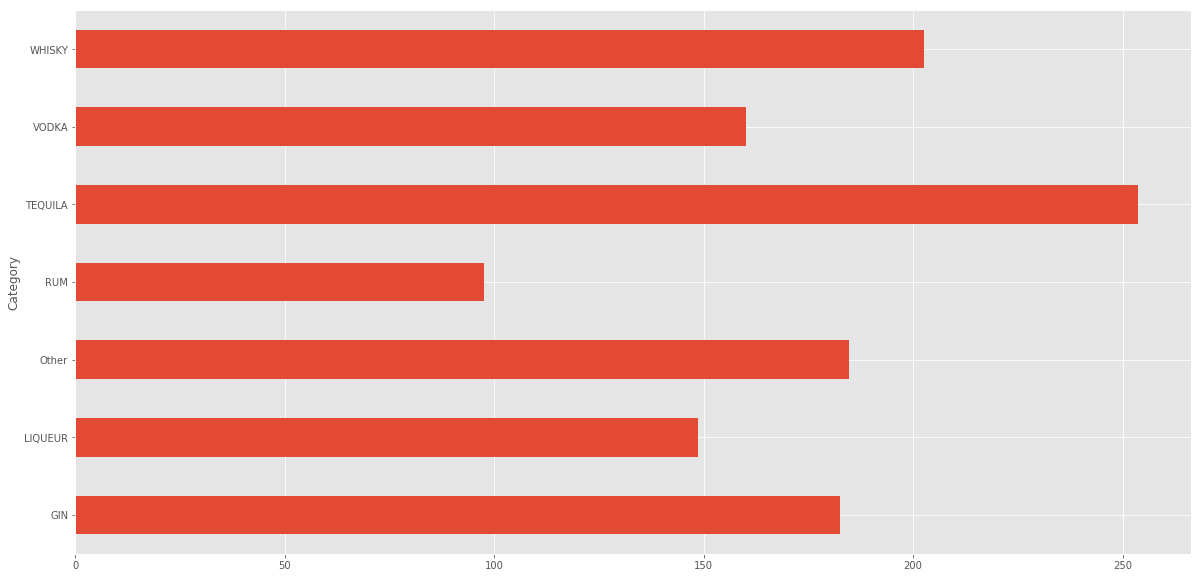

In [72]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
df_grouped = df.groupby(by=['Category'])
sales_rate = df_grouped.sale_dollars.mean()
ax = sales_rate.plot(kind='barh')

While whiskey had the highest average cost per liter, the vodka tended to have the highest sale value per purchase among all the alcohol types. This can be attributed to the volume in which vodka can be made and shipped, which likely affected the volume of sale. 

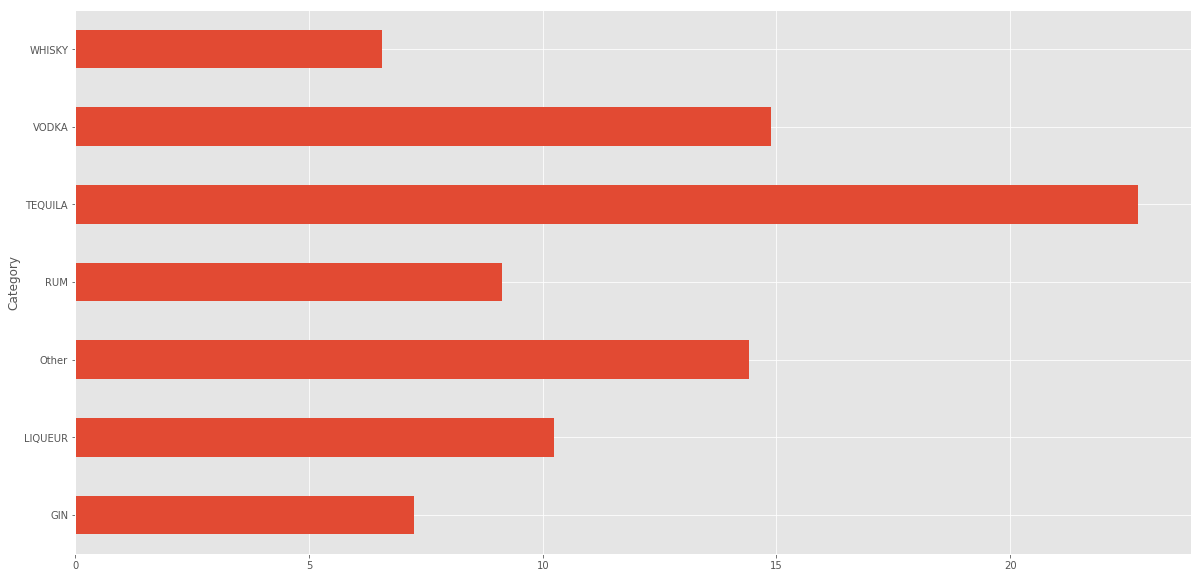

In [73]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
df_grouped = df.groupby(by=['Category'])
sales_rate = df_grouped.bottles_sold.mean()
ax = sales_rate.plot(kind='barh')

Looking at the average bottles sold per pack by way of the liquor categories in our dataset, tequila had the highest amount with over 20 bottles sold per purchase on average. This can be followed by vodka which was referenced earlier.

## Add whiskey specific analysis

Refining market to whiskey to gather further information about whiskey vendors. Since our analysis is going to focus strictly on whiskey sales, it will be important to see how the whiskey distribution looks within our dataset.  

The first thing we are going to reload our dataset as dfwhiskey and replace our nan values as blanks and convert our category_name strings as upper case variables. Like before we are going to categorize our liquors, add dates as well as store names so that we are working with a similar dataset as before. 

In [75]:
#analyze only whiskey
#seperate dataframe limited to whiskey
dfwhiskey = pd.read_csv(r'/Users/jjschued/Documents/Github/7331DataMiningNotebooks/lab1/iowa_subset_2019_400k_random_rows.csv')
#dfwhiskey = pd.read_csv(r'/Users/danielclark/Desktop/SMU/data_mining/7331DataMiningNotebooks/lab1/iowa_subset_2019_400k_random_rows.csv')


#convert nan to blanks
dfwhiskey = (dfwhiskey.replace(r'^\s*$', np.nan, regex=True))
dfwhiskey = (dfwhiskey.replace(np.nan, 'blank', regex=True))

#upper case category name for matching later
dfwhiskey['category_name'] = dfwhiskey['category_name'].str.upper()

#grouping all the store locations into parent stores
dfwhiskey['Category'] = 'Other'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('GINS'), 'Category'] = 'GIN'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('GINS'), 'Category'] = 'GIN'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('GIN'), 'Category'] = 'GIN'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('RUMS'), 'Category'] = 'RUM'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('RUM'), 'Category'] = 'RUM'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('SCOTCH'), 'Category'] = 'WHISKY'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('WHISKIES'), 'Category'] = 'WHISKY'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('WHISKY'), 'Category'] = 'WHISKY'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('WHISKEY'), 'Category'] = 'WHISKY'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('RYE'), 'Category'] = 'WHISKY'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('AMARETTO'), 'Category'] = 'AMARETTO'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('BOURBON'), 'Category'] = 'WHISKY'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('LIQUEURS'), 'Category'] = 'LIQUEUR'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('LIQUEUR'), 'Category'] = 'LIQUEUR'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('VODKAS'), 'Category'] = 'VODKA'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('VODKA'), 'Category'] = 'VODKA'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('BRANDY'), 'Category'] = 'BRANDY'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('BRANDIES'), 'Category'] = 'GIN'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('CREME'), 'Category'] = 'SCHNAPPS'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('SCHNAPPS'), 'Category'] = 'SCHNAPPS'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('TEQUILA'), 'Category'] = 'TEQUILA'
dfwhiskey.loc[dfwhiskey['category_name'].str.contains('TEQUILAS'), 'Category'] = 'TEQUILA'

#get a few stray not available categories per internet this is tequila
dfwhiskey.loc[dfwhiskey['item_description'] == 'Herradura Gold Reposado 6pak', 'Category'] = "Tequila"
dfwhiskey.loc[dfwhiskey['item_description'] == 'Chambord Liqueur w/2 Glasses', 'Category'] = "Liquers"

#grouping all the store locations into parent stores
dfwhiskey['store_parent'] = 'Other'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('Hy-Vee'), 'store_parent'] = 'Hy-Vee'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('Wal-Mart'), 'store_parent'] = 'Wal-Mart'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('SamsClub'), 'store_parent'] = 'SamsClub'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('Fareway'), 'store_parent'] = 'Fareway'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('Kum&Go'), 'store_parent'] = 'Kum&Go'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('CVS'), 'store_parent'] = 'CVS'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('Target'), 'store_parent'] = 'Target'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('Caseys'), 'store_parent'] = 'Caseys'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('Dahls'), 'store_parent'] = 'Dahls'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('WAL-MART'), 'store_parent'] = 'Wal-Mart'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('HY-VEE'), 'store_parent'] = 'Hy-Vee'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('KUM&GO'), 'store_parent'] = 'Kum&Go'
dfwhiskey.loc[dfwhiskey['store_name'].str.contains('QuikTrip'), 'store_parent'] = 'QuikTrip'


#labored conversion of dates to month year and month year by converting to strings
dfwhiskey['month'] = pd.DatetimeIndex(dfwhiskey['date']).month
dfwhiskey['year'] = pd.DatetimeIndex(dfwhiskey['date']).year

dfwhiskey.loc[dfwhiskey['month'] ==1 , 'month'] = 'Jan'
dfwhiskey.loc[dfwhiskey['month'] ==2 , 'month'] = 'Feb'
dfwhiskey.loc[dfwhiskey['month'] ==3 , 'month'] = 'Mar'
dfwhiskey.loc[dfwhiskey['month'] ==4 , 'month'] = 'Apr'
dfwhiskey.loc[dfwhiskey['month'] ==5 , 'month'] = 'May'
dfwhiskey.loc[dfwhiskey['month'] ==6 , 'month'] = 'Jun'
dfwhiskey.loc[dfwhiskey['month'] ==7 , 'month'] = 'Jul'
dfwhiskey.loc[dfwhiskey['month'] ==8 , 'month'] = 'Aug'
dfwhiskey.loc[dfwhiskey['month'] ==9 , 'month'] = 'Sep'
dfwhiskey.loc[dfwhiskey['month'] ==10 , 'month'] = 'Oct'
dfwhiskey.loc[dfwhiskey['month'] ==11 , 'month'] = 'Nov'
dfwhiskey.loc[dfwhiskey['month'] ==12 , 'month'] = 'Dec'


dfwhiskey.loc[dfwhiskey['year'] ==2012 , 'year'] = '2012'
dfwhiskey.loc[dfwhiskey['year'] ==2013 , 'year'] = '2013'
dfwhiskey.loc[dfwhiskey['year'] ==2014 , 'year'] = '2014'
dfwhiskey.loc[dfwhiskey['year'] ==2015 , 'year'] = '2015'
dfwhiskey.loc[dfwhiskey['year'] ==2016 , 'year'] = '2016'
dfwhiskey.loc[dfwhiskey['year'] ==2017 , 'year'] = '2017'
dfwhiskey.loc[dfwhiskey['year'] ==2018 , 'year'] = '2018'
dfwhiskey.loc[dfwhiskey['year'] ==2019 , 'year'] = '2019'

#merge year and month together
dfwhiskey['monthyear'] = dfwhiskey['month'] + "-" + dfwhiskey['year']


Here's the head of our dataset so we can see how it looks.

In [76]:
dfwhiskey.head()

invoice_and_item_number        date  store_number  \
0         INV-23084400002  2019-11-07          3869   
1         INV-23282200001  2019-11-18          4617   
2         INV-19435800130  2019-05-17          2560   
3         INV-23454200002  2019-11-25          2614   
4         INV-23541200001  2019-11-27          2629   

                               store_name                     address  \
0               Bootleggin' Barzini's Fin                412  1st Ave   
1                          Lickety Liquor            2501 HUBBELL AVE   
2              Hy-Vee Food Store / Marion  3600 Business Hwy 151 East   
3  Hy-Vee #3 Food & Drugstore / Davenport          1823 E Kimberly Rd   
4   Hy-Vee Food Store #2 / Council Bluffs            1745 Madison Ave   

             city zip_code                        store_location  \
0      Coralville    52241          POINT (-91.565517 41.672672)   
1      Des Moines    50317          POINT (-93.570489 41.607817)   
2          Marion    52302                                 blank   
3       Davenport    52807  POINT (-90.548919 41.55678100000001)   
4  Council Bluffs    51503          POINT (-95.825137 41.242732)   

  county_number      county  ... state_bottle_retail bottles_sold  \
0            52     JOHNSON  ...                5.78           20   
1            77        POLK  ...               13.13            1   
2            57        LINN  ...               24.75            6   
3            82       SCOTT  ...               31.76           24   
4            78  POTTAWATTA  ...               13.97           12   

   sale_dollars volume_sold_liters  volume_sold_gallons Category  \
0        115.60               7.50                 1.98    Other   
1         13.13               0.05                 0.01    Other   
2        148.50               6.00                 1.58      GIN   
3        762.24              18.00                 4.75   WHISKY   
4        167.64              21.00                 5.54    Other   

   store_parent  month  year  monthyear  
0         Other    Nov  2019   Nov-2019  
1         Other    Nov  2019   Nov-2019  
2        Hy-Vee    May  2019   May-2019  
3        Hy-Vee    Nov  2019   Nov-2019  
4        Hy-Vee    Nov  2019   Nov-2019  

[5 rows x 29 columns]

Next, we are going to redefine our dataset to focus entirely on the whiskey category and rename our original dataset as dfwhiskey. 

In [77]:
dfwhiskey = dfwhiskey[dfwhiskey['Category']=='WHISKY']

Here is another top view of our dataset to show how it looks from above. 

In [78]:
dfwhiskey.head()

invoice_and_item_number        date  store_number  \
3          INV-23454200002  2019-11-25          2614   
5          INV-23540300028  2019-11-27          4312   
15         INV-19970300001  2019-06-13          2675   
24         INV-23645000007  2019-12-03          5866   
29         INV-19201600066  2019-05-07          2651   

                                store_name             address  \
3   Hy-Vee #3 Food & Drugstore / Davenport  1823 E Kimberly Rd   
5             I-80 Liquor / Council Bluffs   2411 S 24TH ST #1   
15                  Hy-Vee #2 / Coralville   3285 Crosspark Rd   
24                  Hometown Family Market          310 2nd St   
29                        Hy-Vee / Waverly    1311 4 Street SW   

              city zip_code                        store_location  \
3        Davenport    52807  POINT (-90.548919 41.55678100000001)   
5   Council Bluffs    51501            POINT (-95.8792 41.238092)   
15      Coralville    52241  POINT (-91.60627100000002 41.721438)   
24       Gladbrook    50635          POINT (-92.716422 42.187653)   
29         Waverly    50677          POINT (-92.475403 42.712263)   

   county_number      county  ... state_bottle_retail bottles_sold  \
3             82       SCOTT  ...               31.76           24   
5             78  POTTAWATTA  ...               43.47            6   
15            52     JOHNSON  ...               32.39           18   
24            86        TAMA  ...               31.50            2   
29             9      BREMER  ...               27.14           30   

    sale_dollars volume_sold_liters  volume_sold_gallons Category  \
3         762.24               18.0                 4.75   WHISKY   
5         260.82                6.0                 1.58   WHISKY   
15        583.02               13.5                 3.56   WHISKY   
24         63.00                2.0                 0.52   WHISKY   
29        814.20               22.5                 5.94   WHISKY   

    store_parent  month  year  monthyear  
3         Hy-Vee    Nov  2019   Nov-2019  
5          Other    Nov  2019   Nov-2019  
15        Hy-Vee    Jun  2019   Jun-2019  
24         Other    Dec  2019   Dec-2019  
29        Hy-Vee    May  2019   May-2019  

[5 rows x 29 columns]

Next, we are going to do a series of calculations to add new columns to our dataset which provides some insight to the sales data of our whiskies. 

These include the following new features:
- cost per liter = sale_dollars / volume_sale_ml
- profit = state_bottle_retail / bottles_sold
- totalcost = state_bottle_cost * bottles_sold
- revenue = state_bottle_retail * bottles_sold
- grossmargin = (revenue - totalcost)/revenue

Ultimately, this is going to give us a clear view of the profatability, and the market size of whiskey so we can better analyze and predict within the dataset.

In [79]:
#do some calculations for cost and profit
dfwhiskey['cost_per_liter'] = dfwhiskey['sale_dollars']/dfwhiskey['volume_sold_liters']

In [80]:
dfwhiskey['profit'] = dfwhiskey['state_bottle_retail']*dfwhiskey['bottles_sold'] - dfwhiskey['state_bottle_cost']* dfwhiskey['bottles_sold']

In [81]:
dfwhiskey['totalcost'] = dfwhiskey['state_bottle_cost']* dfwhiskey['bottles_sold']

In [82]:
dfwhiskey['revenue'] = dfwhiskey['state_bottle_retail']*dfwhiskey['bottles_sold']

In [83]:
dfwhiskey['grossmargin'] = (dfwhiskey['revenue'] - dfwhiskey['totalcost']) / dfwhiskey['revenue']

Here, we sorted gross margin of sale within our data set to get a clearer view of how margins tend to look within the sales in our dataset. 

As we can see, there is a 33% margin that appears across almost all of our sales when you calculate the percentage of what is remaining from the cost over the revenue. We are thiking that is a standard state tax cost for whiskies in the state of Iowa.

In [84]:
#lets do the transforms we did earlier in the EDA
dfwhiskey['sale_dollars_trans'] = np.log(dfwhiskey['sale_dollars'])
dfwhiskey['cost_per_liter_trans'] = np.log(dfwhiskey['cost_per_liter'])

In [85]:
dfwhiskey.sort_values(by='grossmargin', ascending=False).head(100)

invoice_and_item_number        date  store_number  \
121625         INV-18344800004  2019-03-26          5443   
121334         INV-19122500001  2019-05-02          2501   
121653         INV-19341100016  2019-05-14          5286   
121329         INV-17879500032  2019-03-04          2560   
36719          INV-19151100019  2019-05-03          4106   
...                        ...         ...           ...   
38576          INV-16714800233  2019-01-03          2603   
121804         INV-21117100019  2019-08-08          4135   
78917          INV-20962200017  2019-07-31          4247   
78831          INV-17201100004  2019-01-28          2591   
121743         INV-19626400034  2019-05-28          4847   

                                  store_name                     address  \
121625                1st Stop Beverage Shop   2839 East University Ave.   
121334                     Hy-Vee  #2 / Ames              640 Lincolnway   
121653                                 Sauce                108, College   
121329            Hy-Vee Food Store / Marion  3600 Business Hwy 151 East   
36719             Hartig Drug Company #3/JFK      2255 John F Kennedy Rd   
...                                      ...                         ...   
38576   Hy-Vee Wine and Spirits / Bettendorf       2890 Devils Glen Road   
121804         Fareway Stores #925 / Altoona               620 SE 8th St   
78917          Fareway Stores #879 / Belmond             512 River Ave N   
78831     Hy-Vee Wine and Spirits / Atlantic               1602 E 7th St   
121743                 Slagle Foods LeClaire         1301 Eagle Ridge Rd   

              city zip_code                         store_location  \
121625  Des Moines    50317           POINT (-93.561517 41.600476)   
121334        Ames    50010           POINT (-93.619455 42.022848)   
121653   Iowa City    52240                                  blank   
121329      Marion    52302                                  blank   
36719      Dubuque    52002   POINT (-90.72051800000001 42.511352)   
...            ...      ...                                    ...   
38576   Bettendorf    52722           POINT (-90.483701 41.552338)   
121804     Altoona    50009  POINT (-93.458606 41.644082000000004)   
78917      Belmond    50421           POINT (-93.616788 42.850357)   
78831     Atlantic    50022           POINT (-94.990031 41.403856)   
121743    Leclaire    52753           POINT (-90.359813 41.587349)   

       county_number   county  ... month  year  monthyear cost_per_liter  \
121625            77     POLK  ...   Mar  2019   Mar-2019      12.853333   
121334            85    STORY  ...   May  2019   May-2019      12.853333   
121653            52  JOHNSON  ...   May  2019   May-2019      12.853333   
121329            57     LINN  ...   Mar  2019   Mar-2019      12.853333   
36719             31  DUBUQUE  ...   May  2019   May-2019      12.910714   
...              ...      ...  ...   ...   ...        ...            ...   
38576             82    SCOTT  ...   Jan  2019   Jan-2019      10.266667   
121804            77     POLK  ...   Aug  2019   Aug-2019      10.266667   
78917             99   WRIGHT  ...   Jul  2019   Jul-2019       9.600000   
78831             15     CASS  ...   Jan  2019   Jan-2019      10.266667   
121743            82    Scott  ...   May  2019   May-2019      10.266667   

        profit totalcost  revenue  grossmargin  sale_dollars_trans  \
121625   38.64     77.04   115.68     0.334025            4.750828   
121334    9.66     19.26    28.92     0.334025            3.364533   
121653   38.64     77.04   115.68     0.334025            4.750828   
121329    9.66     19.26    28.92     0.334025            3.364533   
36719     4.83      9.63    14.46     0.334025            2.671386   
...        ...       ...      ...          ...                 ...   
38576     5.14     10.26    15.40     0.333766            2.734368   
121804    5.14     10.26    15.40     0.333766            2

Looking at more grossmargin values, we still see the same 33%

In [86]:
dfwhiskey.head(10)

invoice_and_item_number        date  store_number  \
3          INV-23454200002  2019-11-25          2614   
5          INV-23540300028  2019-11-27          4312   
15         INV-19970300001  2019-06-13          2675   
24         INV-23645000007  2019-12-03          5866   
29         INV-19201600066  2019-05-07          2651   
30         INV-23443700008  2019-11-25          2536   
32         INV-20172700090  2019-06-24          2512   
79         INV-23172800009  2019-11-12          3881   
81         INV-19221100078  2019-05-07          5351   
85         INV-23526800002  2019-11-27          2521   

                                store_name             address  \
3   Hy-Vee #3 Food & Drugstore / Davenport  1823 E Kimberly Rd   
5             I-80 Liquor / Council Bluffs   2411 S 24TH ST #1   
15                  Hy-Vee #2 / Coralville   3285 Crosspark Rd   
24                  Hometown Family Market          310 2nd St   
29                        Hy-Vee / Waverly    1311 4 Street SW   
30                  HY-VEE / PLEASANT HILL    4815 Maple Drive   
32     Hy-Vee Wine and Spirits / Iowa City  1720 Waterfront Dr   
79                    7 Rayos Liquor Store       120 E Main St   
81                         Downtown Liquor        1203 5th St.   
85      Hy-Vee Food and Drug / Grand / WDM   1990 Grand Avenue   

               city zip_code                        store_location  \
3         Davenport    52807  POINT (-90.548919 41.55678100000001)   
5    Council Bluffs    51501            POINT (-95.8792 41.238092)   
15       Coralville    52241  POINT (-91.60627100000002 41.721438)   
24        Gladbrook    50635          POINT (-92.716422 42.187653)   
29          Waverly    50677          POINT (-92.475403 42.712263)   
30    Pleasant Hill    50317          POINT (-93.519187 41.598109)   
32        Iowa City    52240  POINT (-91.53046300000001 41.642764)   
79     Marshalltown    50158            POINT (-92.9104 42.049166)   
81       Sioux City    51101          POINT (-96.394671 42.495324)   
85  West Des Moines    50265           POINT (-93.73162 41.571127)   

   county_number      county  ... month  year  monthyear cost_per_liter  \
3             82       SCOTT  ...   Nov  2019   Nov-2019      42.346667   
5             78  POTTAWATTA  ...   Nov  2019   Nov-2019      43.470000   
15            52     JOHNSON  ...   Jun  2019   Jun-2019      43.186667   
24            86        TAMA  ...   Dec  2019   Dec-2019      31.500000   
29             9      BREMER  ...   May  2019   May-2019      36.186667   
30            77        Polk  ...   Nov  2019   Nov-2019      48.960000   
32            52     JOHNSON  ...   Jun  2019   Jun-2019      23.080000   
79            64    MARSHALL  ...   Nov  2019   Nov-2019      31.500000   
81            97    WOODBURY  ...   May  2019   May-2019      43.470000   
85            77        POLK  ...   Nov  2019   Nov-2019      80.000000   

    profit totalcost  revenue  grossmargin  sale_dollars_trans  \
3   254.16    508.08   762.24     0.333438            6.636261   
5    86.94    173.88   260.82     0.333333            5.563831   
15  194.40    388.62   583.02     0.333436            6.368221   
24   21.00     42.00    63.00     0.333333            4.143135   
29  271.50    542.70   814.20     0.333456            6.702206   
30  734.40   1468.80  2203.20     0.333333            7.697666   
32  138.48    276.96   415.44     0.333333            6.029338   
79   42.00     84.00   126.00     0.333333            4.836282   
81   28.98     57.96    86.94     0.333333            4.465218   
85  360.00    720.00  1080.00     0.333333            6.984716   

    cost_per_liter_trans  
3               3.745890  
5               3.772071  
15              3.765532  
24              3.449988  
29              3.588691  
30              3.891004  
32              3.138966  
79              3.449988  
81              3.772071  
85              4.382027  

[10 rows x 36 columns]

In [87]:
df_grouped = dfwhiskey.groupby(by=['vendor_name'])
df_grouped.head()

invoice_and_item_number        date  store_number  \
3              INV-23454200002  2019-11-25          2614   
5              INV-23540300028  2019-11-27          4312   
15             INV-19970300001  2019-06-13          2675   
24             INV-23645000007  2019-12-03          5866   
29             INV-19201600066  2019-05-07          2651   
...                        ...         ...           ...   
246015         INV-21252600005  2019-08-15          4129   
314264         INV-21229200003  2019-08-14          3773   
314265         INV-17524000177  2019-02-13          4129   
314266         INV-19589600071  2019-05-24          3868   
314267         INV-16861500059  2019-01-10          3670   

                                    store_name                address  \
3       Hy-Vee #3 Food & Drugstore / Davenport     1823 E Kimberly Rd   
5                 I-80 Liquor / Council Bluffs      2411 S 24TH ST #1   
15                      Hy-Vee #2 / Coralville      3285 Crosspark Rd   
24                      Hometown Family Market             310 2nd St   
29                            Hy-Vee / Waverly       1311 4 Street SW   
...                                        ...                    ...   
246015                         Cyclone Liquors        626 Lincoln Way   
314264                       Benz Distributing         501 7th Ave SE   
314265                         Cyclone Liquors        626 Lincoln Way   
314266                  Wal-Mart 3630 / Marion  5491 Business Hwy 151   
314267              Wal-Mart 2827 / Coralville       2801 Commerce Dr   

                  city zip_code                        store_location  \
3            Davenport    52807  POINT (-90.548919 41.55678100000001)   
5       Council Bluffs    51501            POINT (-95.8792 41.238092)   
15          Coralville    52241  POINT (-91.60627100000002 41.721438)   
24           Gladbrook    50635          POINT (-92.716422 42.187653)   
29             Waverly    50677          POINT (-92.475403 42.712263)   
...                ...      ...                                   ...   
246015            Ames    50010          POINT (-93.618911 42.022854)   
314264    Cedar Rapids    52401           POINT (-91.659875 41.97574)   
314265            Ames    50010          POINT (-93.618911 42.022854)   
314266          Marion    52302                                 blank   
314267      Coralville    52241          POINT (-91.610774 41.695806)   

       county_number      county  ... month  year  monthyear cost_per_liter  \
3                 82       SCOTT  ...   Nov  2019   Nov-2019      42.346667   
5                 78  POTTAWATTA  ...   Nov  2019   Nov-2019      43.470000   
15                52     JOHNSON  ...   Jun  2019   Jun-2019      43.186667   
24                86        TAMA  ...   Dec  2019   Dec-2019      31.500000   
29                 9      BREMER  ...   May  2019   May-2019      36.186667   
...              ...         ...  ...   ...   ...        ...            ...   
246015            85       STORY  ...   Aug  2019   Aug-2019      60.000000   
314264            57        LINN  ...   Aug  2019   Aug-2019      19.986667   
314265            85       STORY  ...   Feb  2019   Feb-2019      19.986667   
314266            57        LINN  ...   May  2019   May-2019      19.986667   
314267            52     JOHNSON  ...   Jan  2019   Jan-2019      19.986667   

        profit totalcost  revenue  grossmargin  sale_dollars_trans  \
3       254.16    508.08   762.24     0.333438            6.636261   
5        86.94    173.88   260.82     0.333333            5.563831   
15      194.40    388.62   583.02     0.333436            6.368221   
24       21.00     42.00    63.00     0.333333            4.143135   
29      271.50    542.70   814.20     0.333456            6.702206   
...        ...       ...      ...          ...                 ...   
246015   90.00    180.00   270.00     0.333333            5.598422   
314264   90.00    179.8

To look into some aggregate sums within our whiskey dataset, we are going to create new varuables for the sum of bottles sold and sale_dollars, as well as the mean of cost per liter and gross margin. 

Also, we will create datagrames for each so we can see how the whiskey's distribute in these aggregate figures.

In [88]:
sales_rateq = df_grouped.bottles_sold.sum()
sales_rated = df_grouped.sale_dollars.sum()
sales_ratecpl = df_grouped.cost_per_liter.mean()
salesgm = df_grouped.grossmargin.mean()

In [89]:
dfsr = pd.DataFrame(sales_rateq)
dfsdol = pd.DataFrame(sales_rated)
dfscpl = pd.DataFrame(sales_ratecpl)
dfsg = pd.DataFrame(salesgm)

In [90]:
dfsr.sort_values(by='bottles_sold', ascending=False).head(10)

bottles_sold
vendor_name                           
PERNOD RICARD USA               105068
DIAGEO AMERICAS                  29552
Infinium Spirits                 22497
William Grant & Sons Inc         15926
SAZERAC NORTH AMERICA            10698
SAZERAC COMPANY  INC             10665
Jim Beam Brands                   8651
BACARDI USA INC                   7716
CEDAR RIDGE VINEYARDS LL          4411
Edrington Group USA LLC           4200

Looking at the top 10 bottles sold in the whiskey category, we can see that the number one on the list is Pernod Ricard at over 100k bolttles sold, followed distantly by Dieago Americas at 29,500. 

In [91]:
dfsdol.sort_values(by='sale_dollars', ascending=False).head(10)

sale_dollars
vendor_name                           
PERNOD RICARD USA           2965631.76
DIAGEO AMERICAS              935867.44
Infinium Spirits             634224.71
William Grant & Sons Inc     509568.03
Jim Beam Brands              227406.10
BACARDI USA INC              216439.87
SAZERAC COMPANY  INC         188508.57
Edrington Group USA LLC      185043.45
MOET HENNESSY USA            168206.25
CEDAR RIDGE VINEYARDS LL     142926.26

As a function of bottles sold, we are seeing a similar distirbution with regards to sale_dollars in our top whiskies. Pernod Richard is nearing 3 million dollars in sales followed by Diageo Americas that is under 1 million dollars in sales. 

In [92]:
dfscpl.sort_values(by='cost_per_liter', ascending=False).head(10)

cost_per_liter
vendor_name                                    
PACIFIC EDGE WINE & SPIRITS          145.564444
IMPEX BEVERAGE INC                   123.086667
HOTALING & CO                        104.243810
W J Deutsch & Sons LTD                93.320000
GoAmericaGo Beverages LLC             89.461075
MOET HENNESSY USA                     74.180870
Foundry Distilling Company, LLC       71.983333
Vision Wine & Spirit LLC              69.010256
Paterno Imports LTD                   68.098667
MISSISSIPPI RIVER DISTIL              66.810435

Interestingly, looking at the high cost per liter vendors, Pactific Edge Wine and Spirits has the highest cost per liter at over 115 dollars, followed by Impex Beverage and Hotaling at just over 100 dollars. 

In [93]:
salesbyvendor = pd.merge(dfsr, dfsdol, how = 'left', on='vendor_name')
salesbyvendor = pd.merge(salesbyvendor, dfscpl, how = 'left', on='vendor_name')
salesbyvendor = pd.merge(salesbyvendor, dfsg, how = 'left', on='vendor_name')
salesbyvendor

bottles_sold  sale_dollars  cost_per_liter  \
vendor_name                                                                     
American Heritage Distillers, LLC            12        189.60       21.066667   
BACARDI USA INC                            7716     216439.87       28.791171   
BAD BEAR ENTERPRISES LLC                    413      18987.00       60.047619   
Brown Forman Corp.                         2284      68098.15       41.052515   
CEDAR RIDGE VINEYARDS LL                   4411     142926.26       44.172657   
...                                         ...           ...             ...   
Three Rangers                                 2         74.64       49.760000   
Vision Wine & Spirit LLC                     54       2817.91       69.010256   
W J Deutsch & Sons LTD                       19       1329.81       93.320000   
Wilderness Trail Distillery                  36       1440.00       53.333333   
William Grant & Sons Inc                  15926     509568.03       51.849234   

                                   grossmargin  
vendor_name                                     
American Heritage Distillers, LLC     0.333544  
BACARDI USA INC                       0.333334  
BAD BEAR ENTERPRISES LLC              0.333333  
Brown Forman Corp.                    0.333437  
CEDAR RIDGE VINEYARDS LL              0.333396  
...                                        ...  
Three Rangers                         0.333333  
Vision Wine & Spirit LLC              0.333352  
W J Deutsch & Sons LTD                0.333333  
Wilderness Trail Distillery           0.333333  
William Grant & Sons Inc              0.333346  

[61 rows x 4 columns]

Next, we are going to merge our datasets so that we can group our measures of bottles sold, sale_dollars, cost_per_liter and gross margin by our 61 vendors, so we can see how they rank in our key finance values. 

In [94]:
salesbyvendor.sort_values(by='cost_per_liter', ascending=False).head(10)

bottles_sold  sale_dollars  cost_per_liter  \
vendor_name                                                                   
PACIFIC EDGE WINE & SPIRITS                36       3930.24      145.564444   
IMPEX BEVERAGE INC                         36       3681.12      123.086667   
HOTALING & CO                              48       3570.24      104.243810   
W J Deutsch & Sons LTD                     19       1329.81       93.320000   
GoAmericaGo Beverages LLC                 769      50006.25       89.461075   
MOET HENNESSY USA                        3993     168206.25       74.180870   
Foundry Distilling Company, LLC           499      15221.40       71.983333   
Vision Wine & Spirit LLC                   54       2817.91       69.010256   
Paterno Imports LTD                        30       1532.22       68.098667   
MISSISSIPPI RIVER DISTIL                  956      30444.54       66.810435   

                                 grossmargin  
vendor_name                                   
PACIFIC EDGE WINE & SPIRITS         0.333336  
IMPEX BEVERAGE INC                  0.333347  
HOTALING & CO                       0.333338  
W J Deutsch & Sons LTD              0.333333  
GoAmericaGo Beverages LLC           0.333375  
MOET HENNESSY USA                   0.333417  
Foundry Distilling Company, LLC     0.333368  
Vision Wine & Spirit LLC            0.333352  
Paterno Imports LTD                 0.333359  
MISSISSIPPI RIVER DISTIL            0.333413

In [96]:
salesbyvendor.sort_values(by='sale_dollars', ascending=False).head(10)

bottles_sold  sale_dollars  cost_per_liter  \
vendor_name                                                            
PERNOD RICARD USA               105068    2965631.76       50.308440   
DIAGEO AMERICAS                  29552     935867.44       59.427849   
Infinium Spirits                 22497     634224.71       38.625414   
William Grant & Sons Inc         15926     509568.03       51.849234   
Jim Beam Brands                   8651     227406.10       36.642989   
BACARDI USA INC                   7716     216439.87       28.791171   
SAZERAC COMPANY  INC             10665     188508.57       17.979126   
Edrington Group USA LLC           4200     185043.45       66.699662   
MOET HENNESSY USA                 3993     168206.25       74.180870   
CEDAR RIDGE VINEYARDS LL          4411     142926.26       44.172657   

                          grossmargin  
vendor_name                            
PERNOD RICARD USA            0.333377  
DIAGEO AMERICAS              0.333368  
Infinium Spirits             0.333439  
William Grant & Sons Inc     0.333346  
Jim Beam Brands              0.333391  
BACARDI USA INC              0.333334  
SAZERAC COMPANY  INC         0.333383  
Edrington Group USA LLC      0.333400  
MOET HENNESSY USA            0.333417  
CEDAR RIDGE VINEYARDS LL     0.333396

In [99]:
salesbyvendor.sort_values(by='grossmargin', ascending=False).head(100)

bottles_sold  sale_dollars  cost_per_liter  \
vendor_name                                                                     
Castle Brands                               232       3792.74       21.614884   
American Heritage Distillers, LLC            12        189.60       21.066667   
Phillips Beverage                          3317      58490.20       27.621371   
DUNKEL CORPORATION                          360       9154.80       33.906667   
Cats Eye Distillery                         199       5751.56       38.514497   
...                                         ...           ...             ...   
S&B Farmstead Distillery                    120       4955.22       53.757500   
DEHNER DISTILLERY                            87       2208.75       33.250000   
Green Frog Distillery, LLC                  760      18870.00       33.915663   
Campari America                             268      11031.00       66.564706   
LUXCO INC                                  1476      40608.75       36.534050   

                                   grossmargin  
vendor_name                                     
Castle Brands                         0.333551  
American Heritage Distillers, LLC     0.333544  
Phillips Beverage                     0.333481  
DUNKEL CORPORATION                    0.333464  
Cats Eye Distillery                   0.333447  
...                                        ...  
S&B Farmstead Distillery              0.333333  
DEHNER DISTILLERY                     0.333333  
Green Frog Distillery, LLC            0.333333  
Campari America                       0.333333  
LUXCO INC                             0.333333  

[61 rows x 4 columns]

<Figure size 1440x720 with 0 Axes>

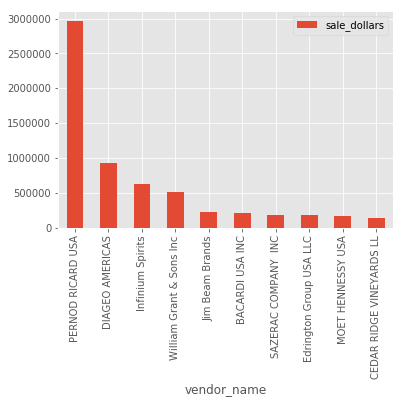

In [100]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sales_rate = dfsdol.sort_values(by='sale_dollars', ascending=False).head(10)
ax = sales_rate.plot(kind='bar')

<Figure size 1440x720 with 0 Axes>

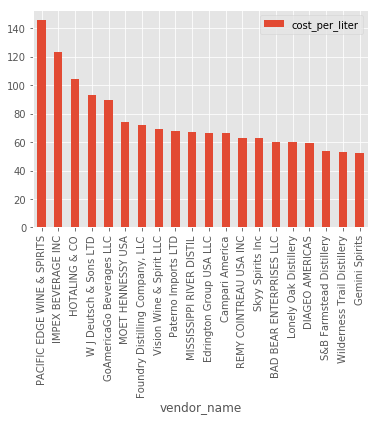

In [101]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sales_rate = dfscpl.sort_values(by='cost_per_liter', ascending=False).head(20)
ax = sales_rate.plot(kind='bar')

Above are some additional plots to help you visualize a more complete dataset on cost per liter as well as sales dollar of our specific whiskeis in the study. As discussed before, the Pernod Richard whiskey is the top selling vendor,while Pacific Edge Whiskey has the highest cost per liter, ensinuating they are seeling the most valueable whiskey. 


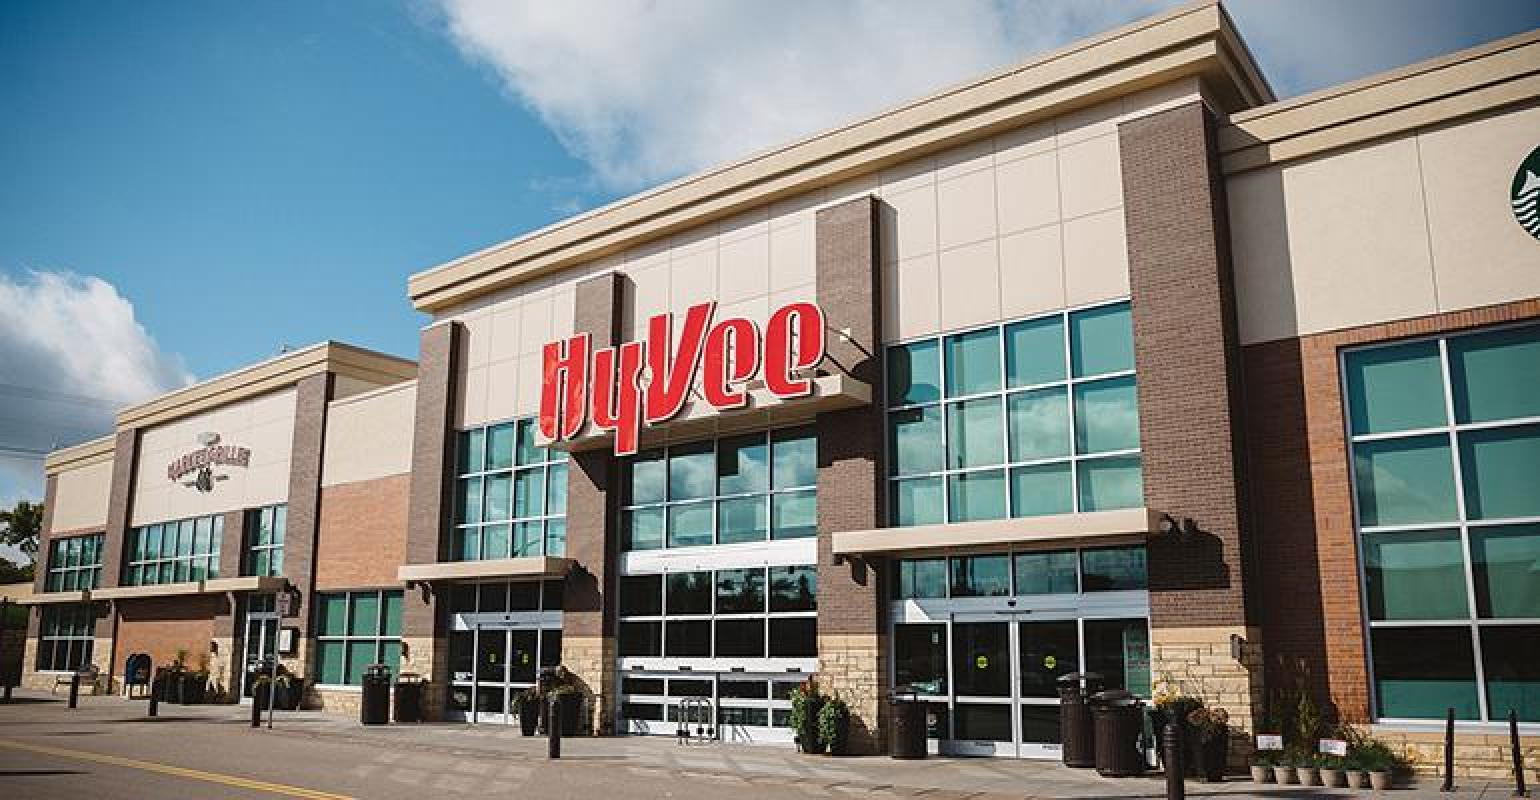
If we are interested in big box retailers, lets look into Hy-Vee.

In [102]:
hv_df = pd.get_dummies(df['store_parent'], drop_first=False)

hv_df = pd.concat([df, hv_df], axis = 1, sort=False)

In [103]:
hv_df.head()

invoice_and_item_number        date store_number  \
0         INV-23084400002  2019-11-07         3869   
1         INV-23282200001  2019-11-18         4617   
2         INV-19435800130  2019-05-17         2560   
3         INV-23454200002  2019-11-25         2614   
4         INV-23541200001  2019-11-27         2629   

                               store_name                     address  \
0               Bootleggin' Barzini's Fin                412  1st Ave   
1                          Lickety Liquor            2501 HUBBELL AVE   
2              Hy-Vee Food Store / Marion  3600 Business Hwy 151 East   
3  Hy-Vee #3 Food & Drugstore / Davenport          1823 E Kimberly Rd   
4   Hy-Vee Food Store #2 / Council Bluffs            1745 Madison Ave   

             city zip_code                        store_location  \
0      Coralville    52241          POINT (-91.565517 41.672672)   
1      Des Moines    50317          POINT (-93.570489 41.607817)   
2          Marion    52302                                 blank   
3       Davenport    52807  POINT (-90.548919 41.55678100000001)   
4  Council Bluffs    51503          POINT (-95.825137 41.242732)   

  county_number      county  ... monthyear sale_dollars_trans cost_per_liter  \
0            52     JOHNSON  ...  Nov-2019           4.750136      15.413333   
1            77        POLK  ...  Nov-2019           2.574900     262.600000   
2            57        LINN  ...  May-2019           5.000585      24.750000   
3            82       SCOTT  ...  Nov-2019           6.636261      42.346667   
4            78  POTTAWATTA  ...  Nov-2019           5.121819       7.982857   

  cost_per_liter_trans CVS Fareway  Hy-Vee  Other  Target  Wal-Mart  
0             2.735233   0       0       0      1       0         0  
1             5.570632   0       0       0      1       0         0  
2             3.208825   0       0       1      0       0         0  
3             3.745890   0       0       1      0       0         0  
4             2.077296   0       0       1      0       0         0  

[5 rows x 38 columns]

In [104]:
hv_grouped = hv_df.groupby(by=['Category', 'Hy-Vee']).median()
hv_grouped

pack  bottle_volume_ml  state_bottle_cost  \
Category Hy-Vee                                              
GIN      0         12              1000             15.500   
         1         12               750             16.500   
LIQUEUR  0         12               750             11.090   
         1         12               750             10.490   
Other    0          8               750             11.000   
         1         12               750              8.500   
RUM      0         12               750              7.350   
         1         12               750              8.390   
TEQUILA  0         12              1000              7.345   
         1         12              1000              7.830   
VODKA    0         12               750              7.110   
         1         12               750              7.920   
WHISKY   0         10               750             19.480   
         1          6               750             20.980   

                 state_bottle_retail  bottles_sold  sale_dollars  \
Category Hy-Vee                                                    
GIN      0                     23.25           4.0        93.000   
         1                     24.75           6.0       116.880   
LIQUEUR  0                     16.64           5.0        68.190   
         1                     15.74           6.0        89.740   
Other    0                     16.50           6.0        76.800   
         1                     12.75           6.0        78.750   
RUM      0                     11.03           6.0        66.180   
         1                     12.59           6.0        68.040   
TEQUILA  0                     11.02           6.0       125.280   
         1                     11.75          12.0       141.000   
VODKA    0                     10.67           6.0        69.600   
         1                     11.88           6.0        76.440   
WHISKY   0                     29.22           3.0        94.680   
         1                     31.47           3.0       107.235   

                 volume_sold_liters  volume_sold_gallons  sale_dollars_trans  \
Category Hy-Vee                                                                
GIN      0                     3.50                 0.92            4.532599   
         1                     4.50                 1.18            4.761148   
LIQUEUR  0                     3.00                 0.79            4.222298   
         1                     4.50                 1.18            4.496914   
Other    0                     4.50                 1.18            4.341205   
         1                     6.75                 1.78            4.366278   
RUM      0                     4.50                 1.18            4.192378   
         1                     3.75                 0.99            4.220096   
TEQUILA  0                     9.60                 2.53            4.830551   
         1                    12.00                 3.17            4.948760   
VODKA    0                     6.00                 1.58            4.242765   
         1                     9.00                 2.37            4.336506   
WHISKY   0                     2.25                 0.59            4.550503   
         1                     2.25                 0.59            4.675003   

                 cost_per_liter  cost_per_liter_trans  CVS  Fareway  Other  \
Category Hy-Vee                                                              
GIN      0            23.250000              3.146305    0        0      1   
         1            23.400000              3.152736    0        0      0   
LIQUEUR  0            19.950000              2.993229    0        0      1   
         1            19.950000              2.993229    0        0      0   
Other    0            20.800000              3.034953    0        0      1   
         1            14.700000              2.687847    0        0      0   
RUM      0            15.98666

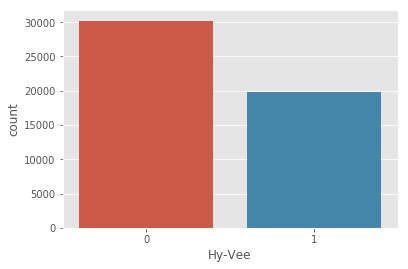

In [106]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.countplot(x='Hy-Vee', data=hv_df);

Over 30k sales in our dataset were attributed to stores other than Hy-Vee, while the remaining 20k are from Hy-Vee

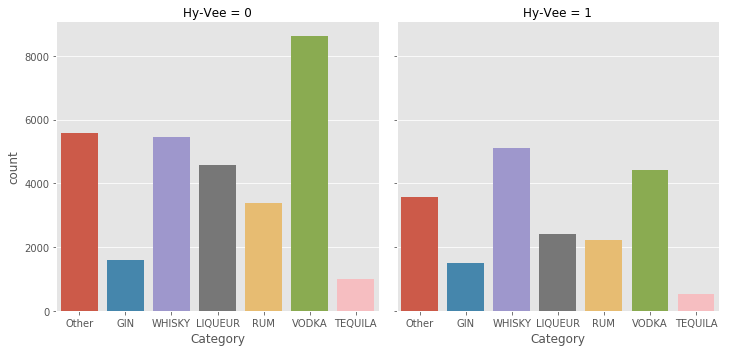

In [107]:
sns.catplot(x='Category', col='Hy-Vee', kind='count', data=hv_df);

In [108]:
pd.crosstab(hv_df.Category, hv_df['Hy-Vee'], margins=True).style.background_gradient(cmap='autumn_r')

In the two plots above, we can see the categorical sales tended to remain relatively consistent between Hy-Vee stores as opposed to other liquor stores in the area. This would suggest that Hy-Vee isn't buying liquor differently than anyone else in the state. 

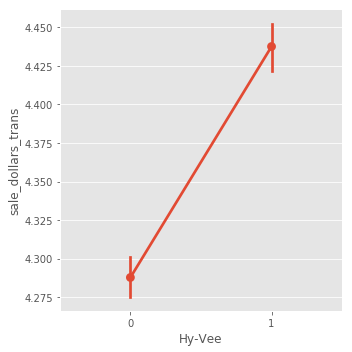

In [109]:
sns.catplot('Hy-Vee', "sale_dollars_trans", kind='point', data=hv_df)

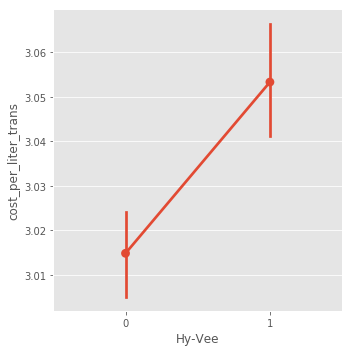

In [110]:
sns.catplot('Hy-Vee', "cost_per_liter_trans", kind='point', data=hv_df)

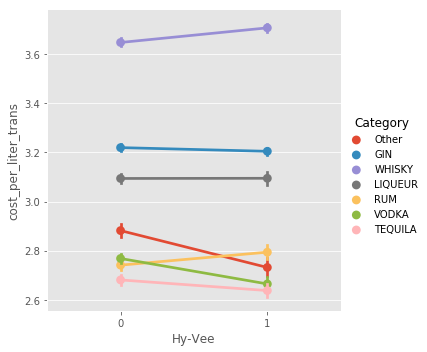

In [111]:
sns.catplot('Hy-Vee','cost_per_liter_trans',hue='Category', kind='point', data=hv_df);

I was curious to see if HyVee Charged Higher Prices than the competitors. Looking at the cost per liter (which would normalize liquor cost), It appears that Hy-Vee had much higher prices. However, grouping by category, we can see that this might have been dur to the volume of whiskey sales Hy-Vee had compared to non-hy-vee stores. The costs are pretty consistent. 

Lets try this with Small Liquor stores vs large big-box stores, using the same code as above but with Other instead of Hy-Vee.

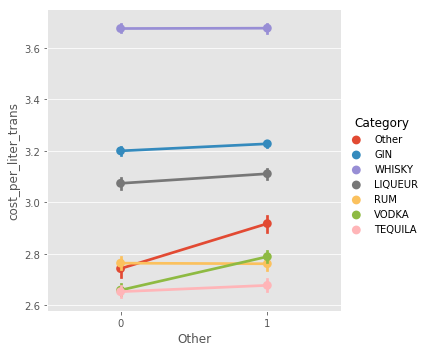

In [112]:
sns.catplot('Other','cost_per_liter_trans',hue='Category', kind='point', data=hv_df);

With 0 being Big Box Stores and 1 Being Small Retailers, we can see that consistently, Small Chains are charging higher prices. 

## Explore Joint Attributes
The next section dives deeper into the relationsihps between all the variables in our dataset as well as some of the key relationships found between our features. This will be a starting point for us to better understand if we can begin to think about addressing and removing highly correlated features in our set. 

To measure this, we will be able to run grid plots and heat maps with each feature against one another. The plots that are highly coorelated will be closer to 1 while the plots that are highly negatively correlated will be closer to -1. 

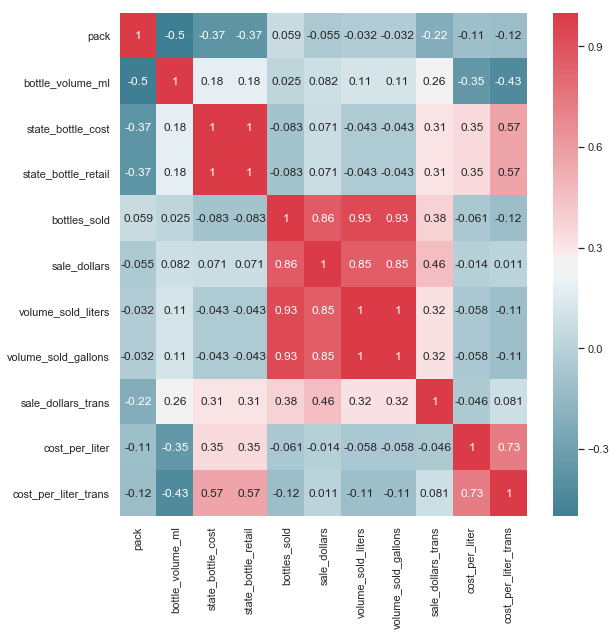

In [113]:
# plot the correlation matrix using seaborn
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), cmap=cmap, annot=True)
f.tight_layout()

Looking at a heat map of our coorelation plot, we can see some interesting occurances happening in the bottom right corner with regards to the volume stats as well as the sales stats. We are seeing cases of volume_sold_gallons and liters having a 0.93 coorelation to bottles sold. Which makes sense, because the greater the volume of sales would suggest teh greater number of bottles in the purchase. 

In addition, these volume stats are highly correlated at 0.85 to sale dollars. While this is expected as it costs more to get more whiskey, it's interesting as there tends to be somewhwat of a minimal affect with regards to volume discounts. 

ValueError: color kwarg must have one color per dataset

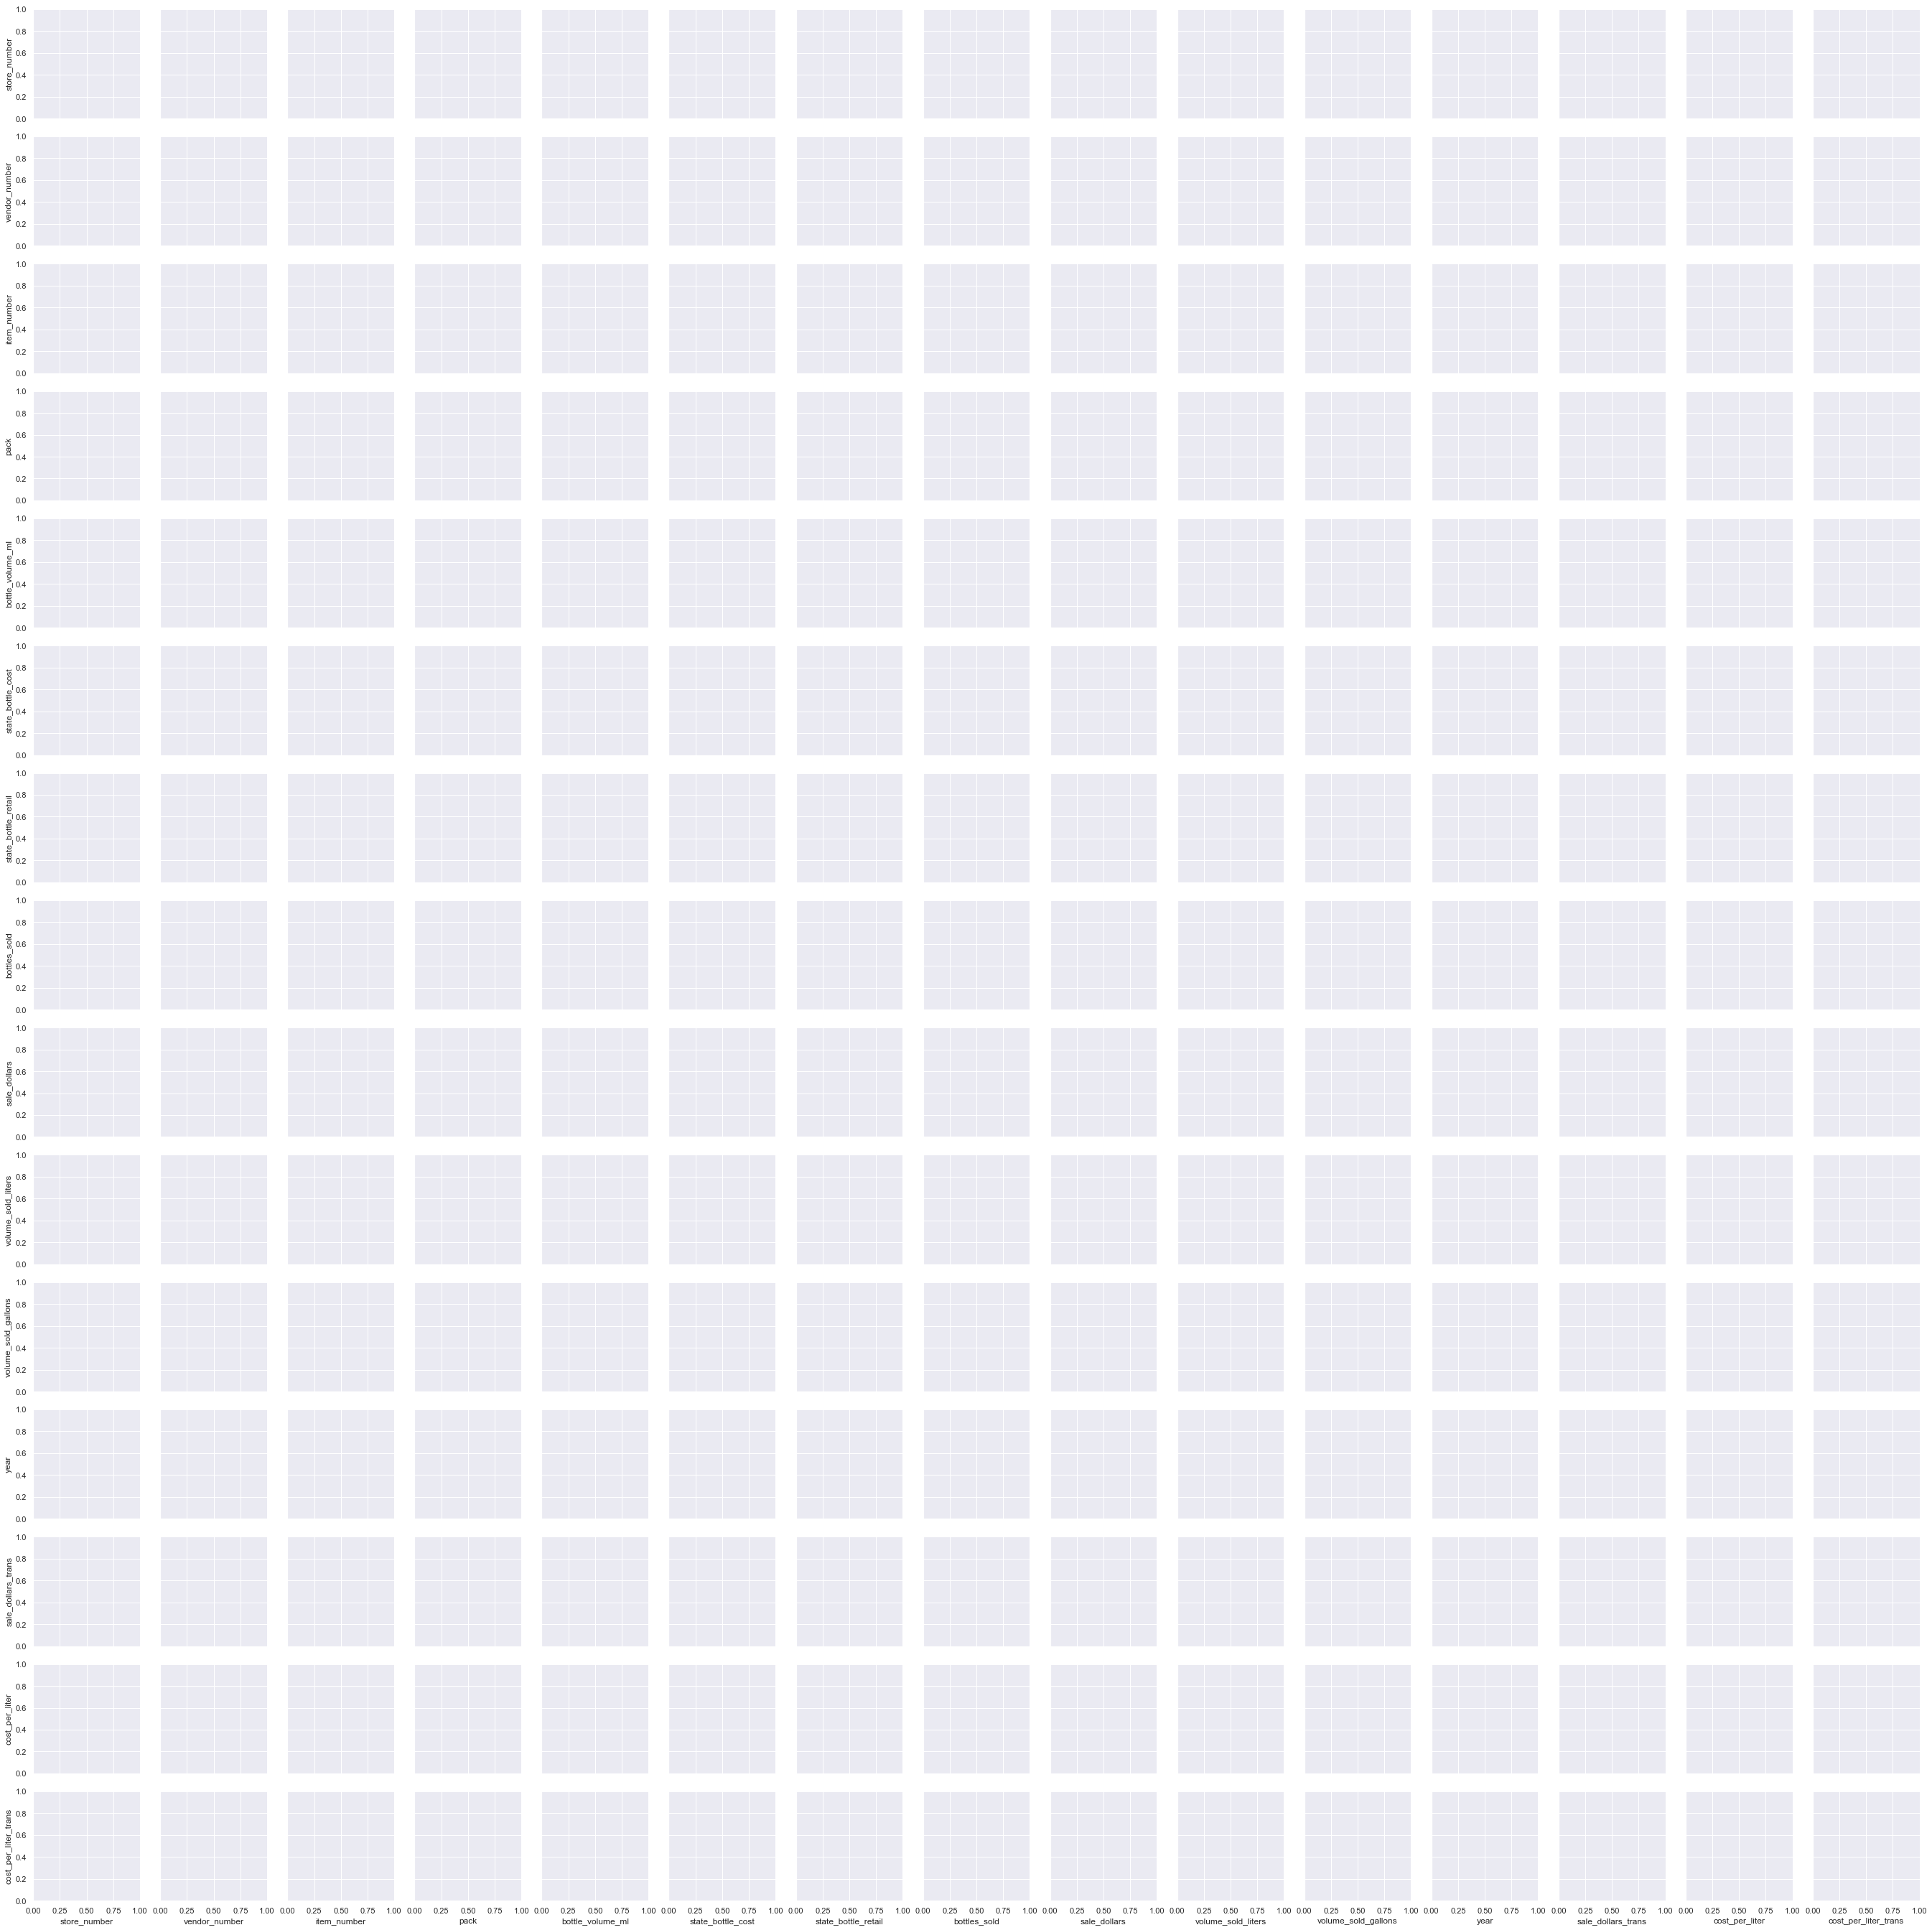

In [114]:
# now try plotting some of the previous plots, way more visually appealing!!
#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
sns.pairplot(df)
sns.pairplot(df, hue= 'Category')
sns.pairplot(df, hue='Category', diag_kind = 'kde')

Here we can see a couple pair scatter plots that show our coorelations in action. In the bottom right corner, we can see those same highly correlated values visualized in a plot, and broken out by drink type.

Interestingly, we can see some clustering start to appear in some of the relationships, particularly between tequila and whiskey as it relates to volume sold and sales data.

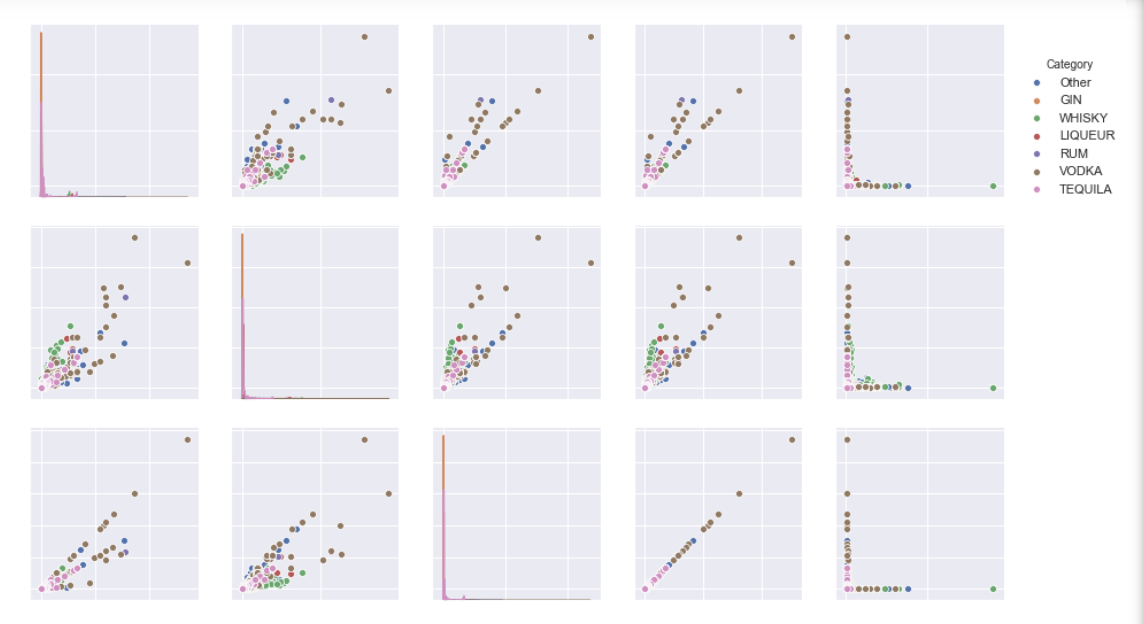

In [86]:
#cross tab example
dfcross = pd.crosstab(df['Category'], df['store_parent'],  margins=True, margins_name="Total")
dfcross

store_parent  CVS  Fareway  Hy-Vee  Other  Target  Wal-Mart  Total
Category                                                          
GIN             8      109    1499   1391      34        60   3101
LIQUEUR         7      313    2424   3856      42       365   7007
Other           5      688    3570   4245     111       536   9155
RUM             4      205    2231   2770      18       380   5608
TEQUILA         2       89     538    849       2        66   1546
VODKA          48      534    4409   7486      93       457  13027
WHISKY         36      545    5112   4496     133       234  10556
Total         110     2483   19783  25093     433      2098  50000

Next, we are going to look at a cross tab and explore the relationships with alcohol type and store.

As you can see in the table above, Hy Vee and Other take up the majority of sales, however Other is a stronger Vodka seller while Hyvee sales more whieksy. This is confirmed below with our chart that shows the mix of alcohol sales int he story. For each, Vodka and whiskey are among the top sellers. 

In [87]:
#Normalized Cross Tab
dfcrossnorm = pd.crosstab(df['Category'], df['store_parent'], normalize='columns')
dfcrossnorm

store_parent       CVS   Fareway    Hy-Vee     Other    Target  Wal-Mart
Category                                                                
GIN           0.072727  0.043899  0.075772  0.055434  0.078522  0.028599
LIQUEUR       0.063636  0.126057  0.122529  0.153668  0.096998  0.173975
Other         0.045455  0.277084  0.180458  0.169171  0.256351  0.255481
RUM           0.036364  0.082561  0.112774  0.110389  0.041570  0.181125
TEQUILA       0.018182  0.035844  0.027195  0.033834  0.004619  0.031459
VODKA         0.436364  0.215062  0.222868  0.298330  0.214781  0.217827
WHISKY        0.327273  0.219493  0.258404  0.179173  0.307159  0.111535

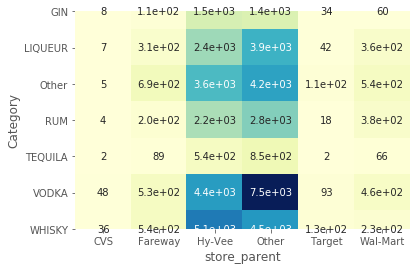

In [88]:
sns.heatmap(pd.crosstab([df['Category']], [df['store_parent']]),
            cmap="YlGnBu", annot=True, cbar=False)

Next is a heatmap which shows the relationship between Vodka and Whiskey amontst the stores, which provides a visual representaiton of the data above. 

In [ ]:
#group wise average
df_grouped = df.groupby(by=['Category', 'store_parent']).mean()
df_grouped

## Explore Attributes and Class
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).



## New Features 
Are there other features that could be added to the data or created from existing features? Which ones?



* Day of the week  
* education  
* median population  
* income groups  
* age groups  
* employment  
* Grouping of Liquor Brands  

We also created a series of columns which were aggregates of other columns:

* Cost Per Liter
* Total Cost
* Revenue 
* Gross Margin
* Log Transform of Sales
* Log Transform of Volume Sold

## Exceptional Work 
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.